In [1]:
# import necessary libraries
import numpy as np
import torch
import gym
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Tuple, Dict
import pandas as pd
from collections import defaultdict
import os
import pickle

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


In [2]:
# Name the features and actions
# Feature names from the Gym-Sepsis environment
FEATURE_NAMES = [
    'albumin', 'anion_gap', 'band_neutrophils', 'bicarbonate', 'bilirubin',
    'BUN', 'chloride', 'creatinine', 'diastolic_BP', 'glucose_1', 'glucose_2',
    'heart_rate', 'hematocrit', 'hemoglobin', 'INR', 'lactate', 'mean_BP',
    'PaCO2', 'platelet_count', 'potassium', 'PT', 'PTT', 'respiratory_rate',
    'sodium', 'SpO2', 'systolic_BP', 'temperature', 'WBC', 'age', 'gender',
    'race_white', 'race_black', 'race_hispanic', 'race_other', 'height',
    'weight', 'ventilation', 'SOFA', 'LODS', 'SIRS', 'qSOFA',
    'qSOFA_sysbp', 'qSOFA_gcs', 'qSOFA_resprate', 'elixhauser', 'blood_culture'
]

ACTION_NAMES = {
    0: '0 - IV, 1-VP',
    1: '0 - IV, 2-VP',
    2: '0 - IV, 3-VP',
    3: '0 - IV, 4-VP',
    4: '1 - IV, 0-VP',
    5: '1 - IV, 1-VP',
    6: '1 - IV, 2-VP',
    7: '1 - IV, 3-VP',
    8: '1 - IV, 4-VP',
    9: '2 - IV, 0-VP',
    10: '2 - IV, 1-VP',
    11: '2 - IV, 2-VP',
    12: '2 - IV, 3-VP',
    13: '2 - IV, 4-VP',
    14: '3 - IV, 0-VP',
    15: '3 - IV, 1-VP',
    16: '3 - IV, 2-VP',
    17: '3 - IV, 3-VP',
    18: '3 - IV, 4-VP',
    19: '4 - IV, 0-VP',
    20: '4 - IV, 1-VP',
    21: '4 - IV, 2-VP',
    22: '4 - IV, 3-VP',
    23: '4 - IV, 4-VP'
}

In [3]:
# Step1: Prepare the dataset
import pickle
import numpy as np
from d3rlpy.dataset import MDPDataset
import d3rlpy

# Load the dataset
file_path = r"C:\Users\liuji\Dropbox\HomeSweetHome\GWU\Yalun Stat\2025 Fall\Project1\STAT8289_project1\sepsis_data_set_1000ep_random_20251005_202927.pkl"

file_path_test = r"C:\Users\liuji\Dropbox\HomeSweetHome\GWU\Yalun Stat\2025 Fall\Project1\STAT8289_project1\sepsis_data_set_test_200ep_random_20251013_151754.pkl"

with open(file_path, 'rb') as f:
    train_set = pickle.load(f)

with open(file_path_test, 'rb') as f:
    test_set = pickle.load(f)

c:\Users\liuji\Dropbox\HomeSweetHome\GWU\Yalun Stat\2025 Fall\Project1\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# STEP 2: Load the model
from d3rlpy.algos import DQN
model_path = r"C:\Users\liuji\Dropbox\HomeSweetHome\GWU\Yalun Stat\2025 Fall\Project1\STAT8289_project1\final_model.pt"

dqn = DQN.from_json(r"C:\Users\liuji\Dropbox\HomeSweetHome\GWU\Yalun Stat\2025 Fall\Project1\STAT8289_project1\d3rlpy_logs\DQN_20251013165810/params.json")

dqn.load_model(model_path)


STEP 4: LEG Analysis

Performing LEG Analysis

--- Analyzing State 1/10 (Episode 0, Timestep 4) ---
Analyzing 41 features...
Selected Action: 4 (IV=0, VP=4)
Top 5 Features:
  1. INR: score=-1.4980, value=-0.54
  2. glucose_1: score=-1.3601, value=-0.01
  3. lactate: score=1.3282, value=0.20
  4. bilirubin: score=-1.3005, value=-0.21
  5. band_neutrophils: score=1.2976, value=-0.32


C:\Users\liuji\AppData\Local\Temp\ipykernel_44928\3687775021.py:373: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved detailed analysis to ./sepsis_leg_analysis/analysis_state_0.png


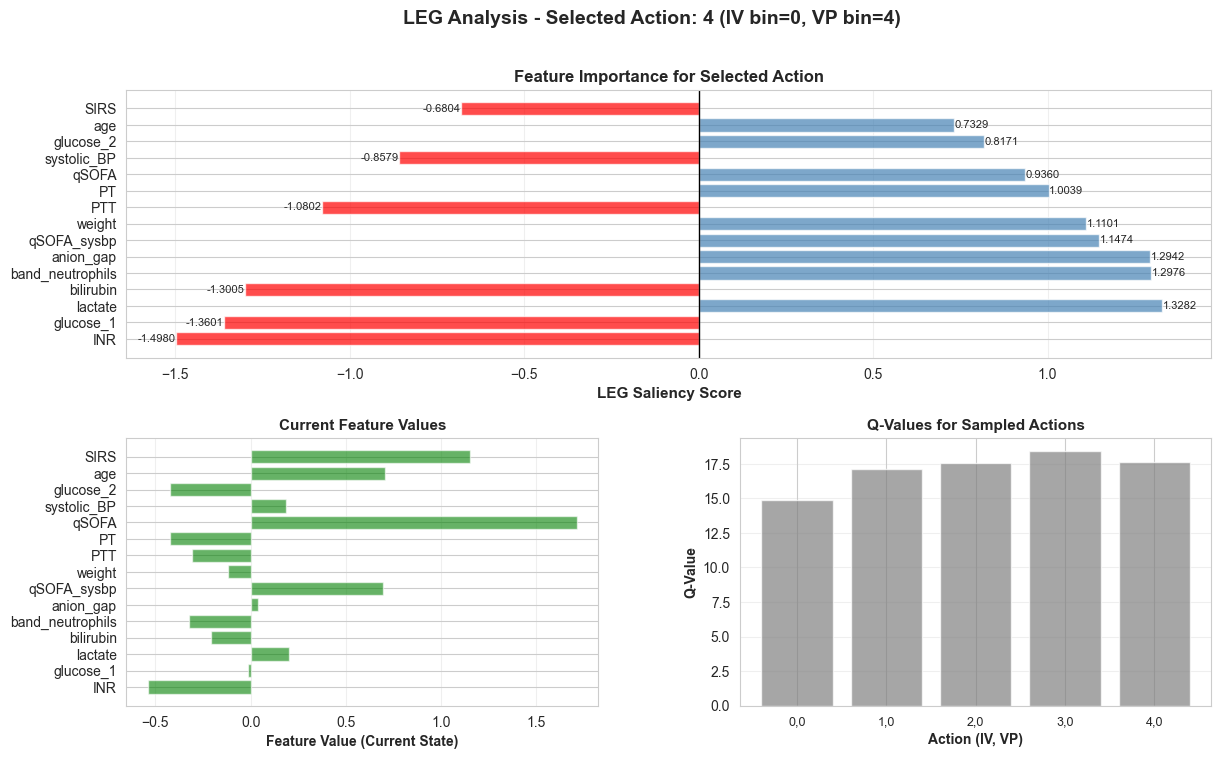

Saved saliency heatmap to ./sepsis_leg_analysis/saliency_state_0.png


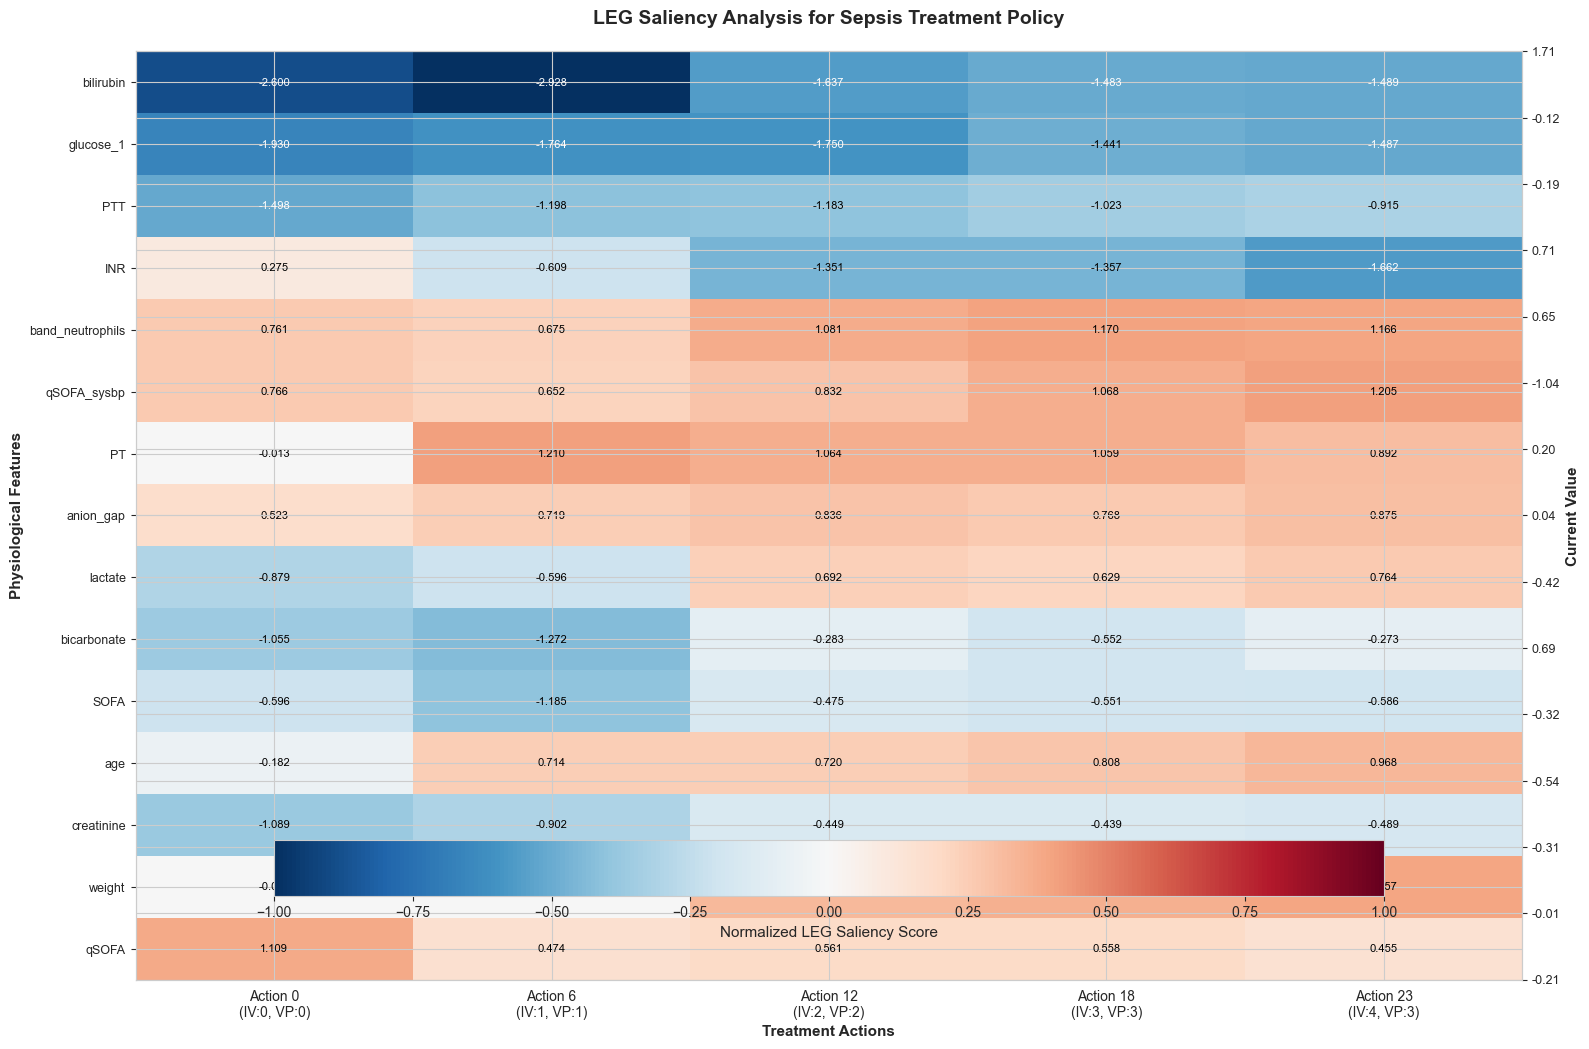


--- Analyzing State 2/10 (Episode 1, Timestep 5) ---
Analyzing 41 features...
Selected Action: 6 (IV=1, VP=1)
Top 5 Features:
  1. bilirubin: score=-2.4339, value=-0.36
  2. qSOFA_gcs: score=-1.6652, value=-0.55
  3. albumin: score=-1.6162, value=0.19
  4. glucose_1: score=-1.6125, value=-0.01
  5. qSOFA_sysbp: score=1.2470, value=0.65


C:\Users\liuji\AppData\Local\Temp\ipykernel_44928\3687775021.py:373: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved detailed analysis to ./sepsis_leg_analysis/analysis_state_1.png


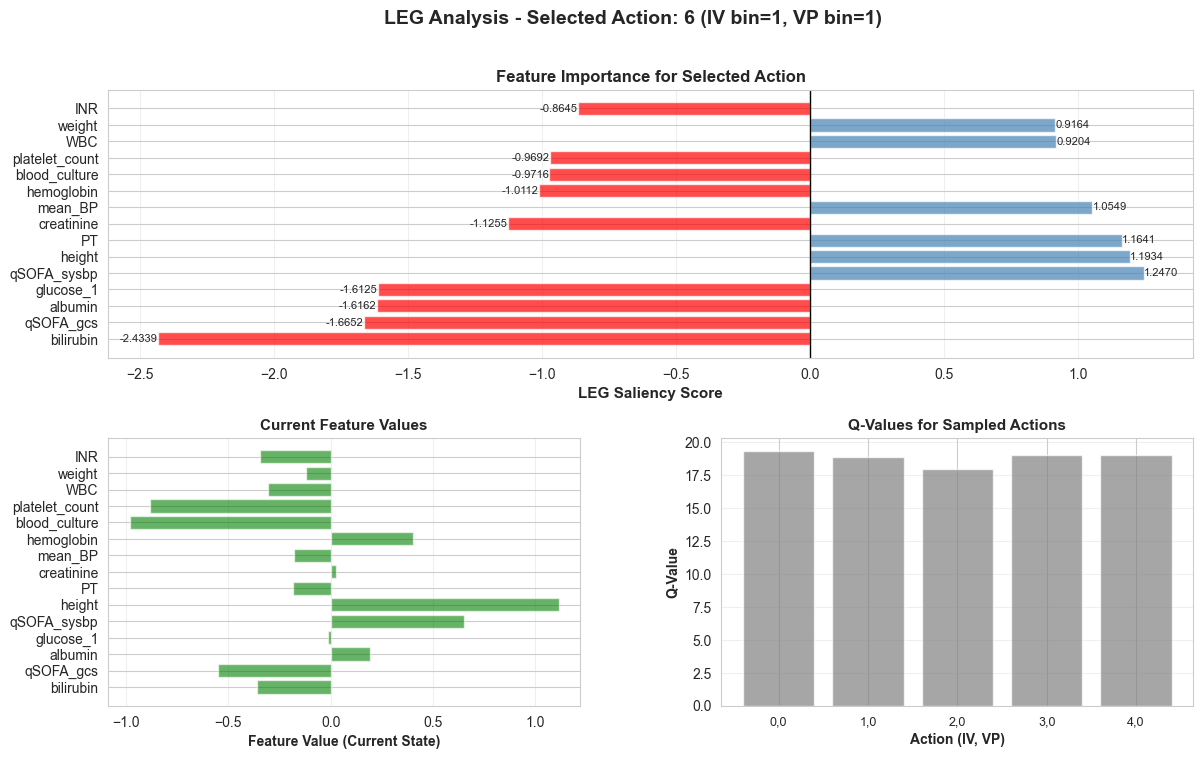

Saved saliency heatmap to ./sepsis_leg_analysis/saliency_state_1.png


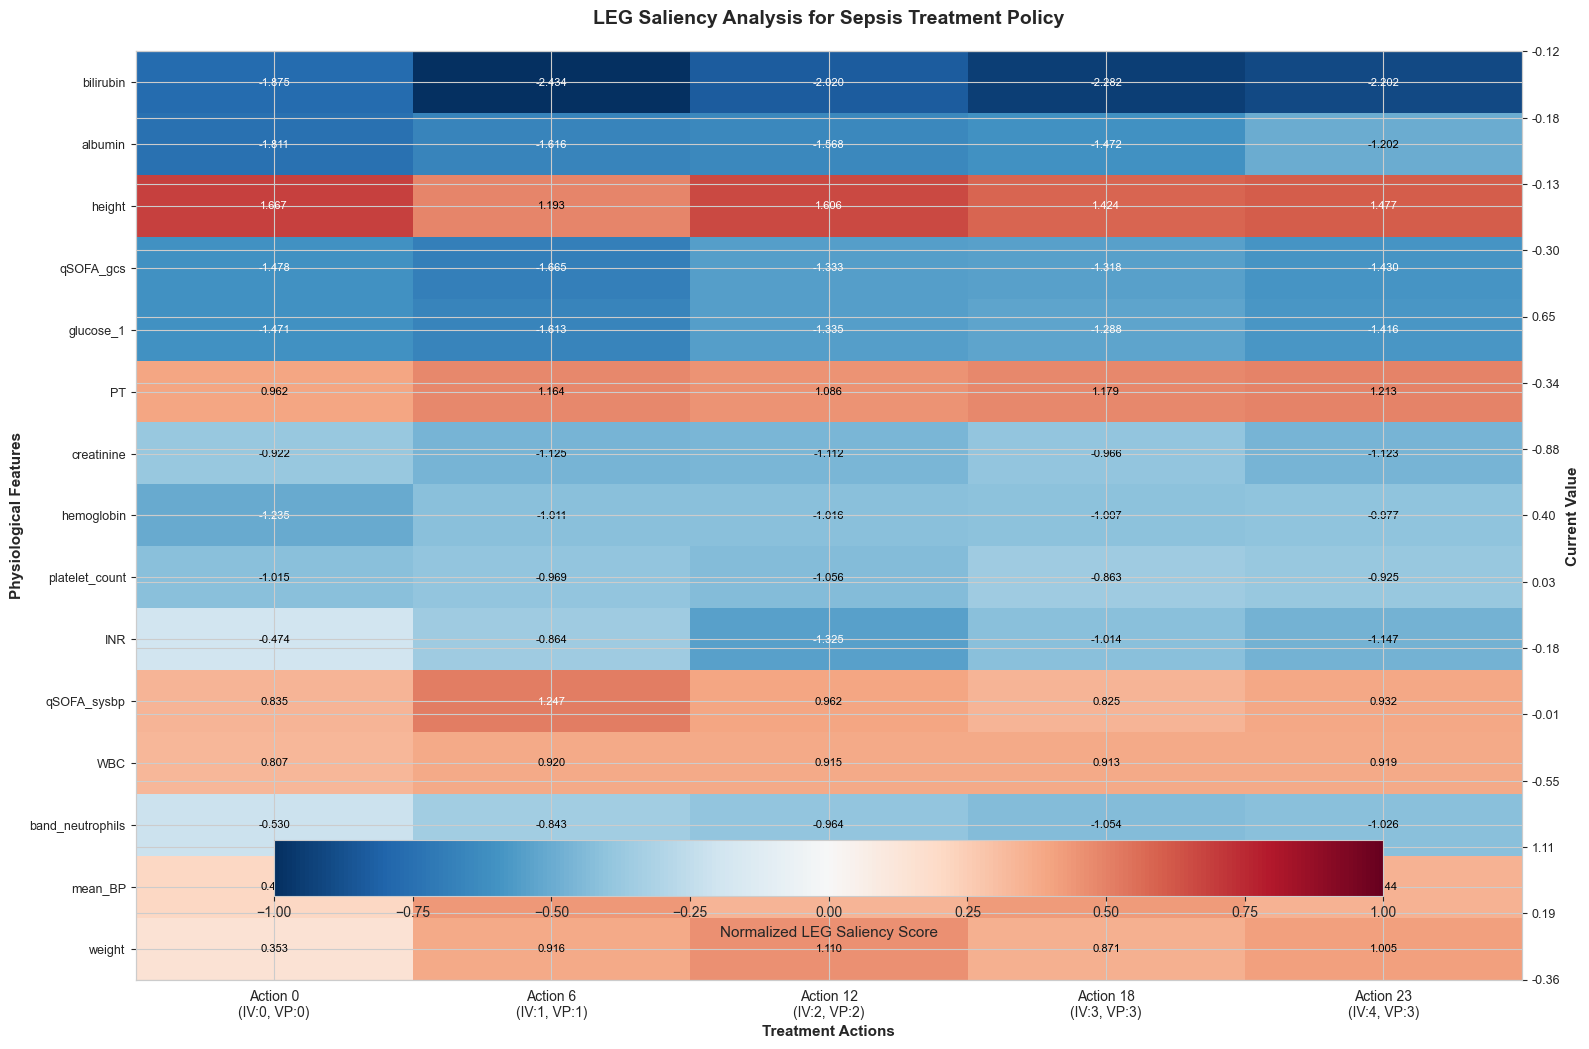


--- Analyzing State 3/10 (Episode 2, Timestep 4) ---
Analyzing 41 features...
Selected Action: 2 (IV=0, VP=2)
Top 5 Features:
  1. SpO2: score=1.6950, value=-0.08
  2. qSOFA_resprate: score=-1.6494, value=-2.40
  3. glucose_1: score=-1.5693, value=0.02
  4. height: score=1.3233, value=0.03
  5. LODS: score=-1.2459, value=0.62


C:\Users\liuji\AppData\Local\Temp\ipykernel_44928\3687775021.py:373: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved detailed analysis to ./sepsis_leg_analysis/analysis_state_2.png


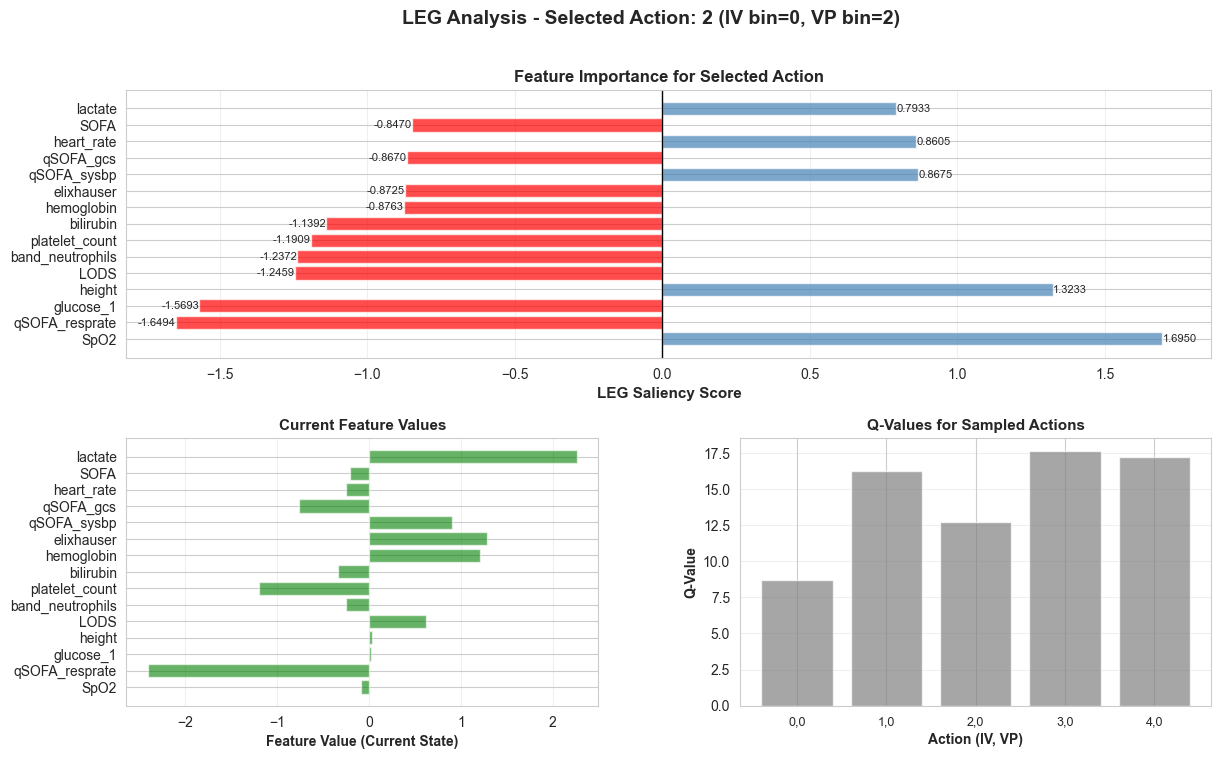

Saved saliency heatmap to ./sepsis_leg_analysis/saliency_state_2.png


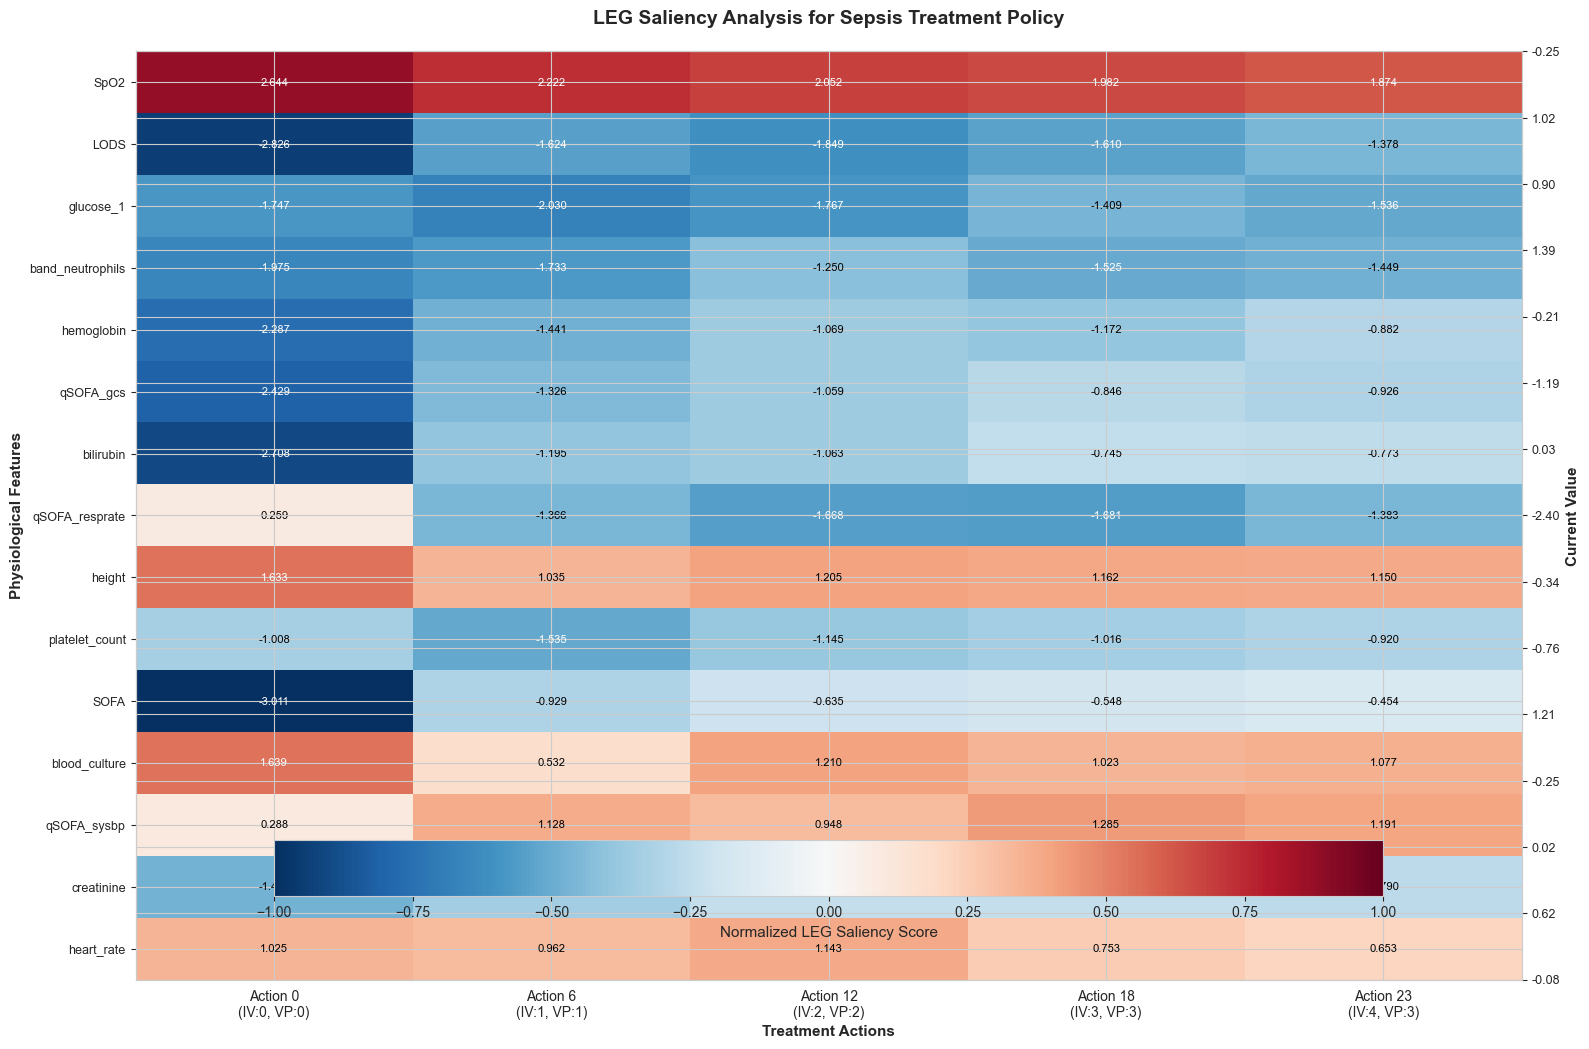


--- Analyzing State 4/10 (Episode 3, Timestep 5) ---
Analyzing 41 features...
Selected Action: 0 (IV=0, VP=0)
Top 5 Features:
  1. albumin: score=-2.5588, value=0.08
  2. glucose_1: score=-2.4630, value=-0.01
  3. height: score=2.1879, value=0.03
  4. hemoglobin: score=-1.9791, value=-0.62
  5. bilirubin: score=-1.6213, value=0.56


C:\Users\liuji\AppData\Local\Temp\ipykernel_44928\3687775021.py:373: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved detailed analysis to ./sepsis_leg_analysis/analysis_state_3.png


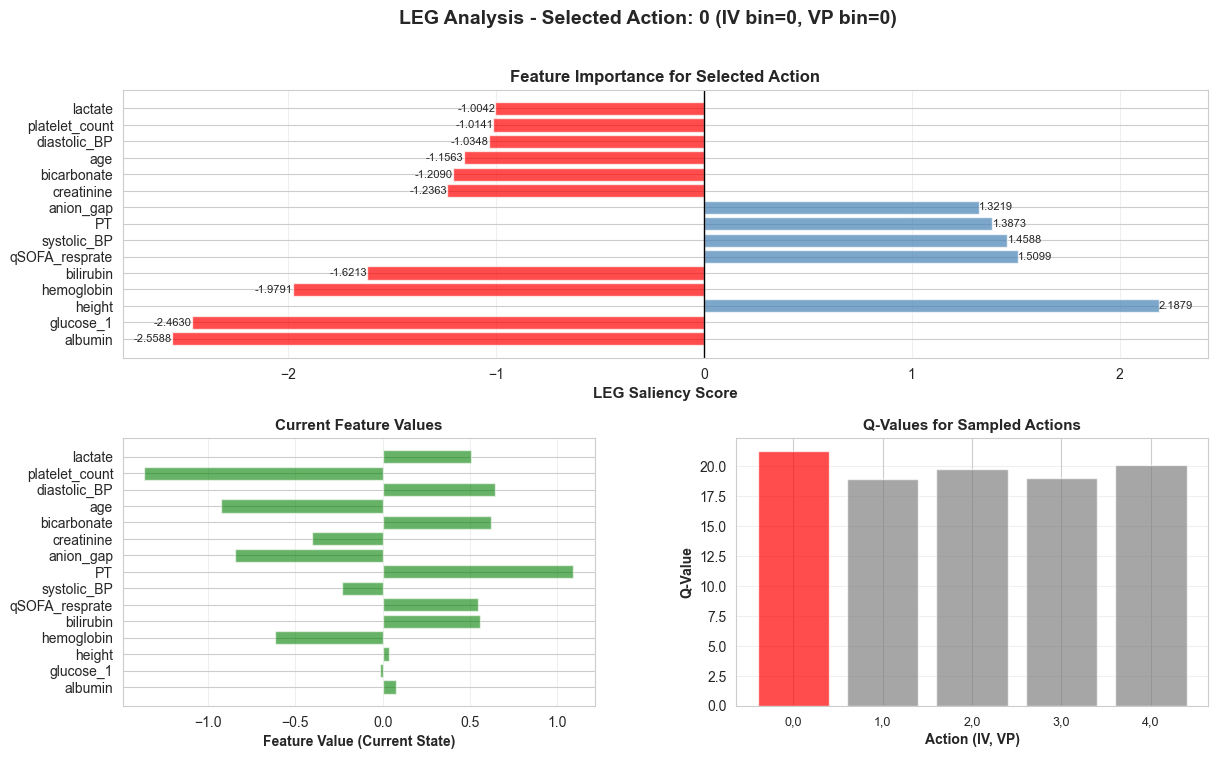

Saved saliency heatmap to ./sepsis_leg_analysis/saliency_state_3.png


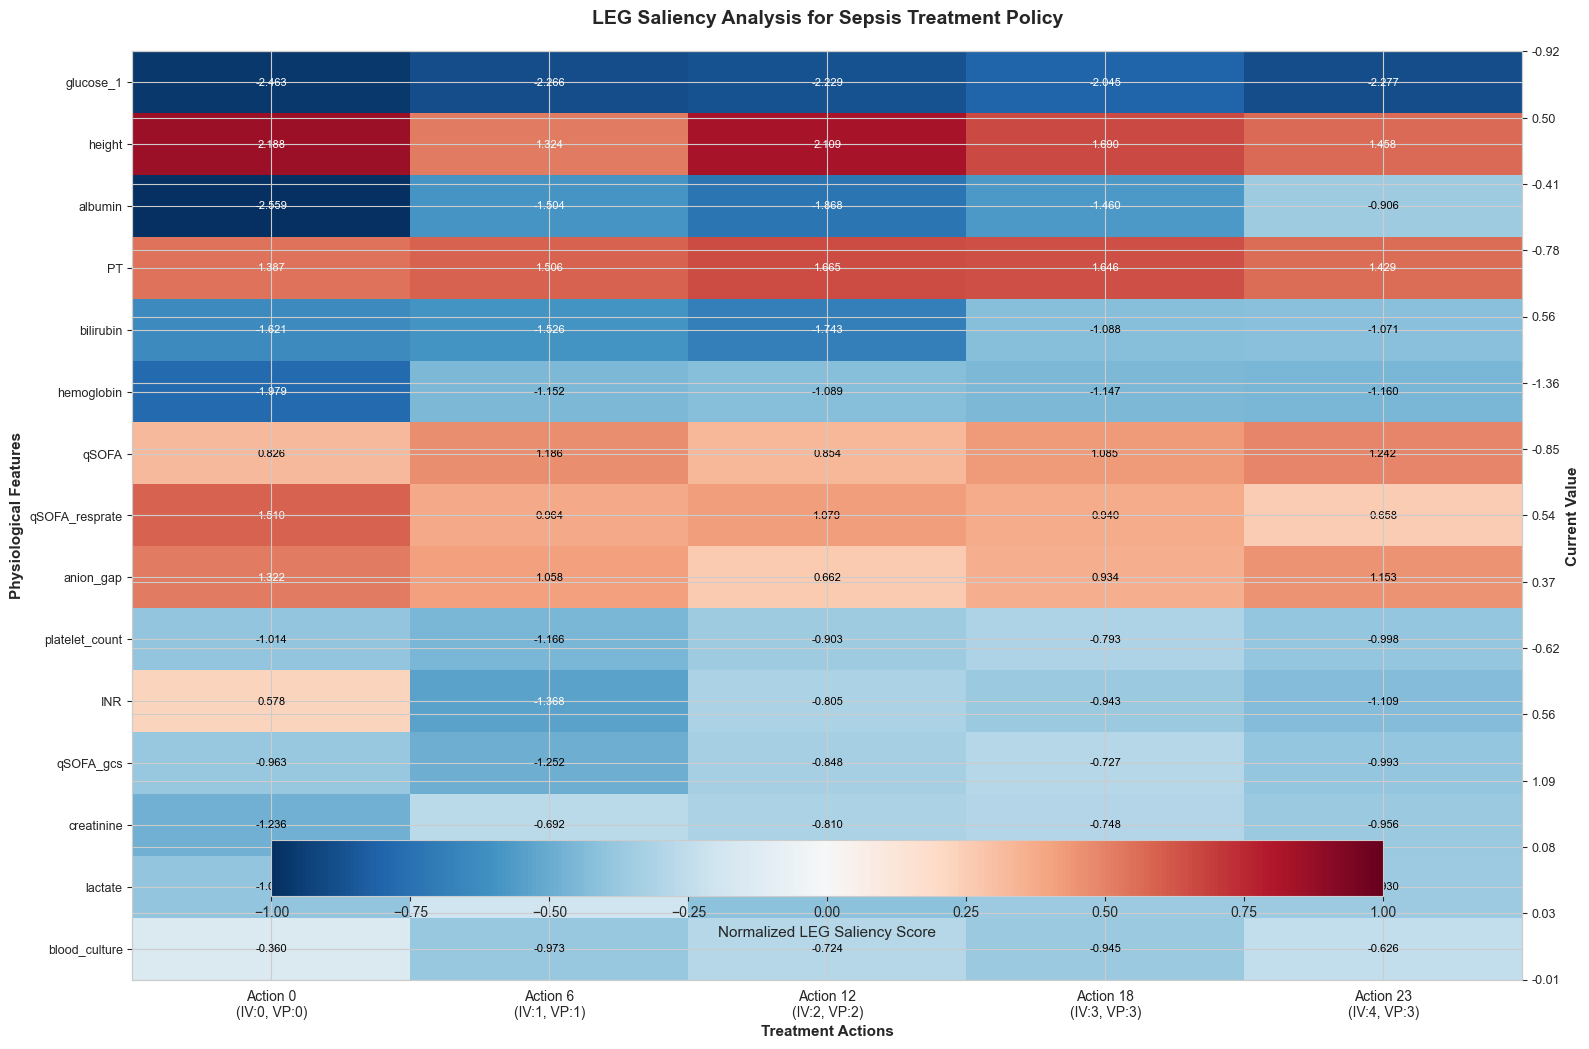


--- Analyzing State 5/10 (Episode 4, Timestep 4) ---
Analyzing 41 features...
Selected Action: 6 (IV=1, VP=1)
Top 5 Features:
  1. INR: score=-1.7996, value=-0.23
  2. bilirubin: score=-1.7910, value=-0.39
  3. blood_culture: score=1.6332, value=1.40
  4. glucose_1: score=-1.1575, value=0.02
  5. qSOFA_resprate: score=-1.0292, value=0.62


C:\Users\liuji\AppData\Local\Temp\ipykernel_44928\3687775021.py:373: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved detailed analysis to ./sepsis_leg_analysis/analysis_state_4.png


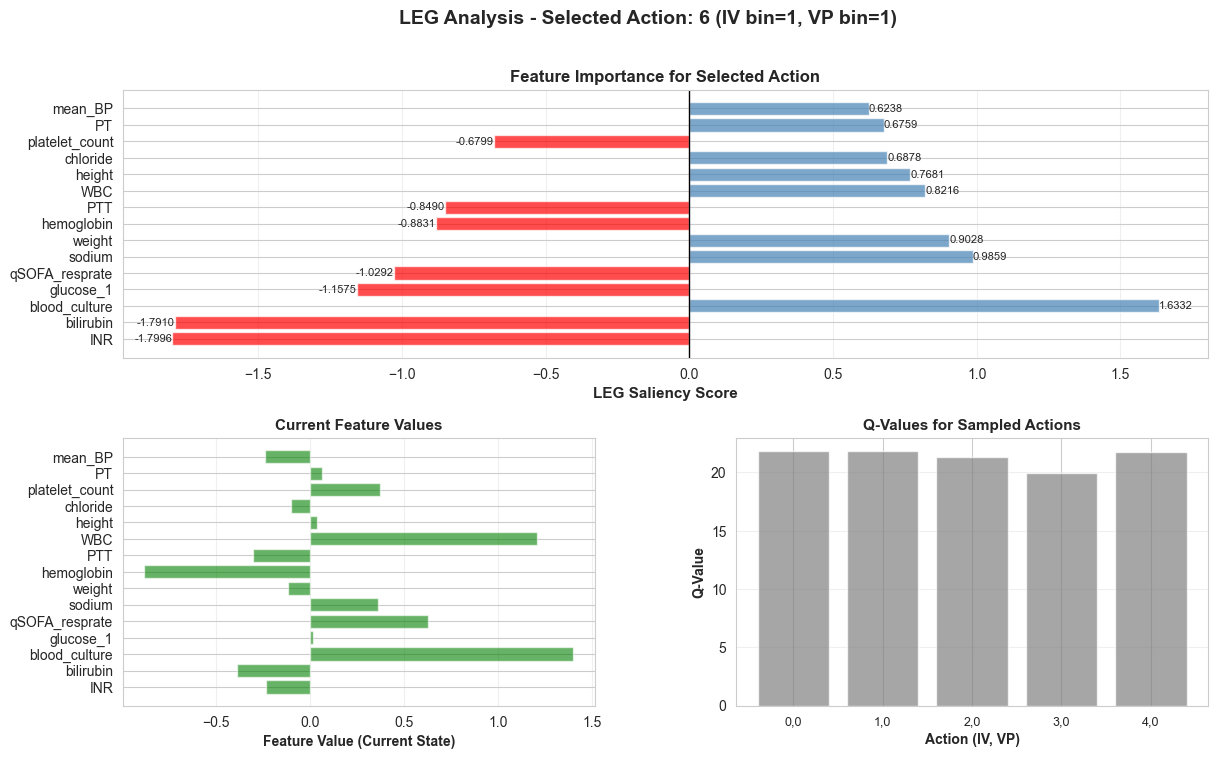

Saved saliency heatmap to ./sepsis_leg_analysis/saliency_state_4.png


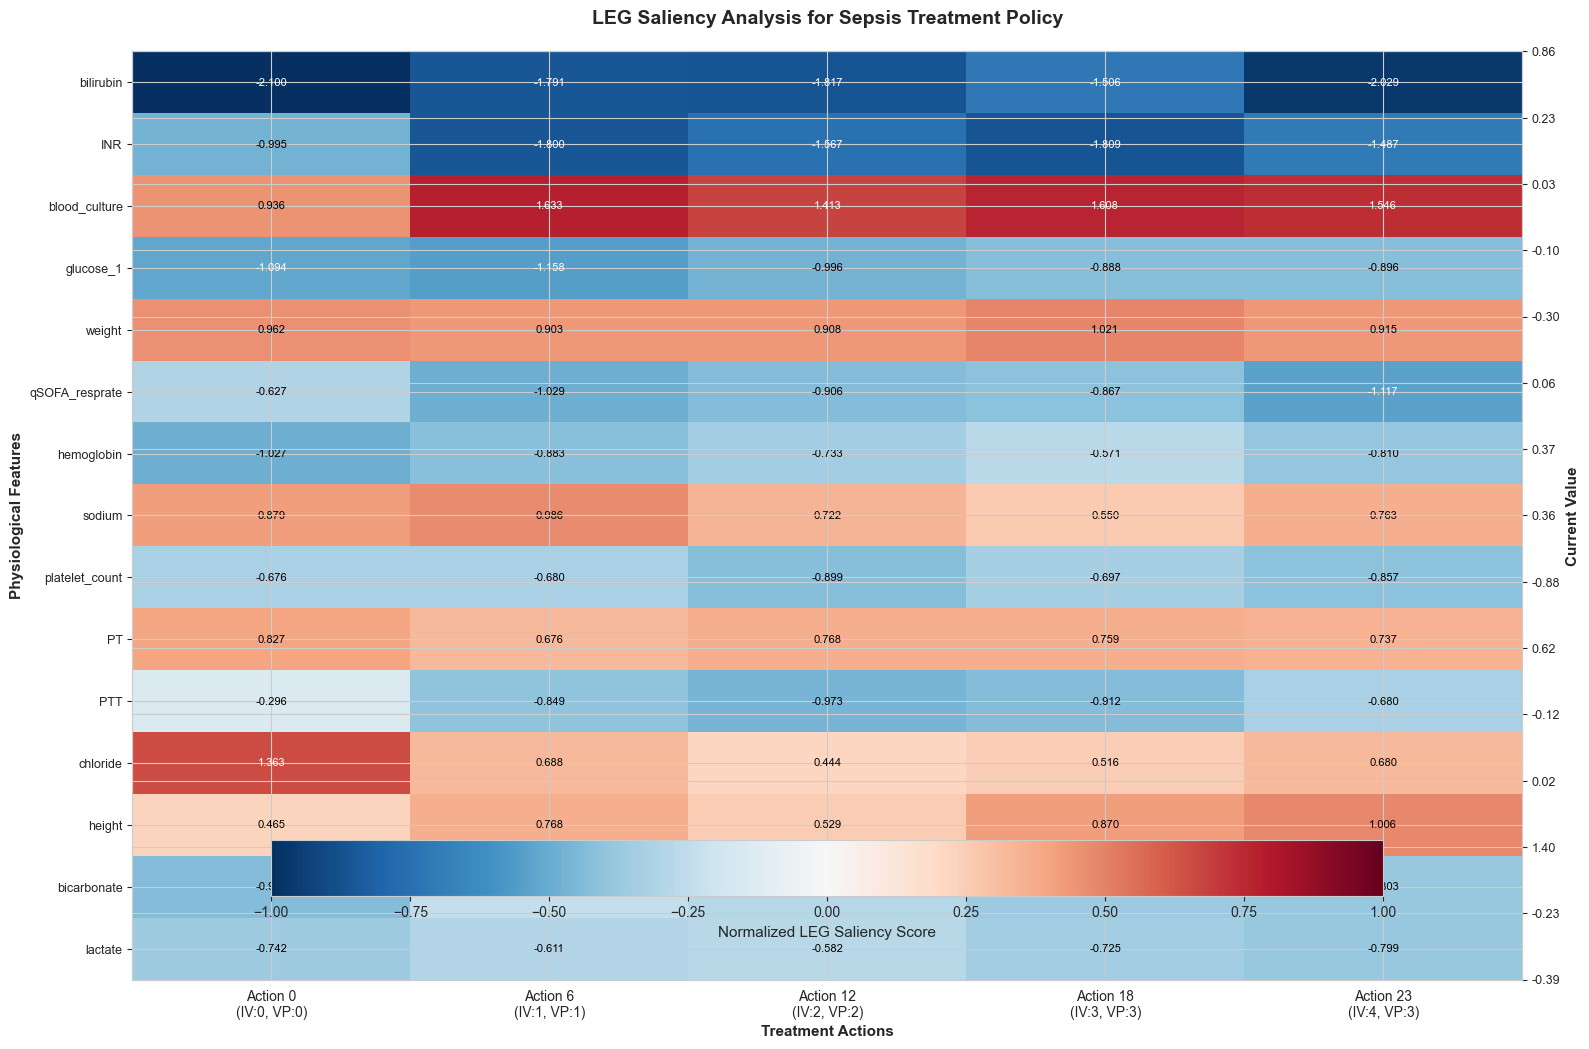


--- Analyzing State 6/10 (Episode 5, Timestep 5) ---
Analyzing 41 features...
Selected Action: 19 (IV=3, VP=4)
Top 5 Features:
  1. LODS: score=-1.8440, value=0.14
  2. heart_rate: score=1.6888, value=1.45
  3. glucose_1: score=-1.3865, value=-0.07
  4. SOFA: score=-1.3166, value=0.11
  5. age: score=-1.1962, value=-0.92


C:\Users\liuji\AppData\Local\Temp\ipykernel_44928\3687775021.py:373: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved detailed analysis to ./sepsis_leg_analysis/analysis_state_5.png


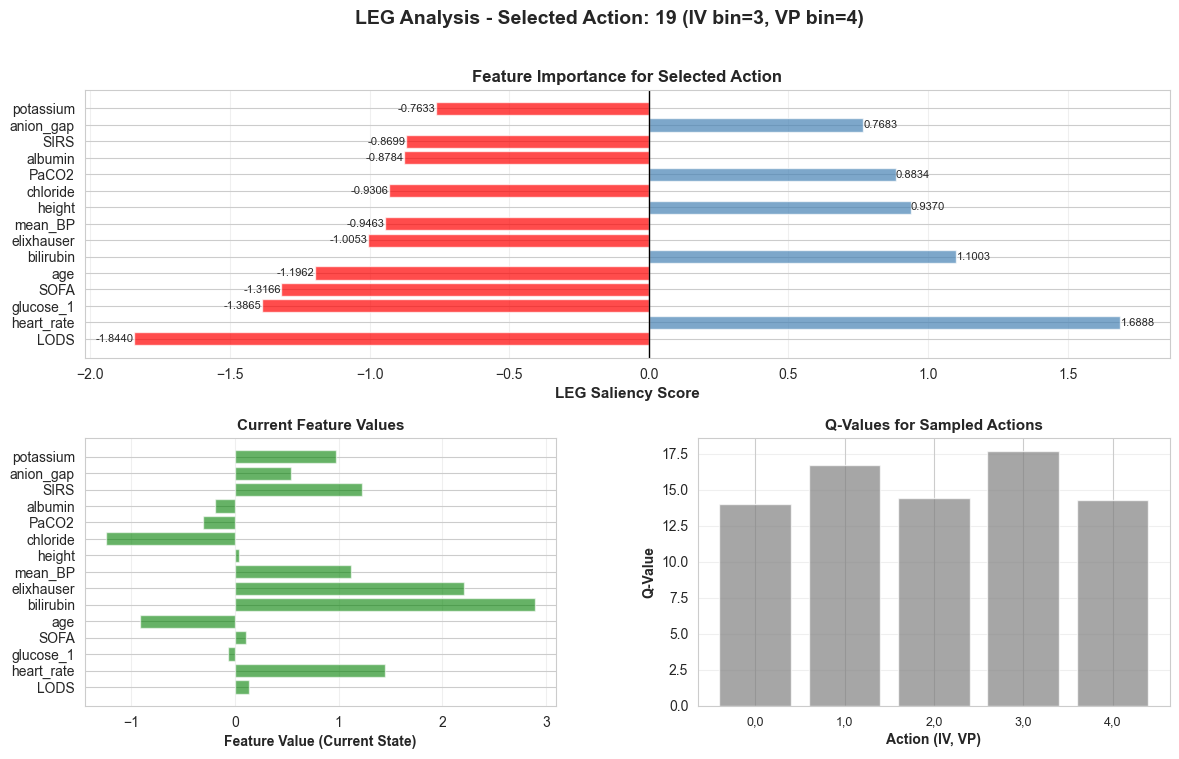

Saved saliency heatmap to ./sepsis_leg_analysis/saliency_state_5.png


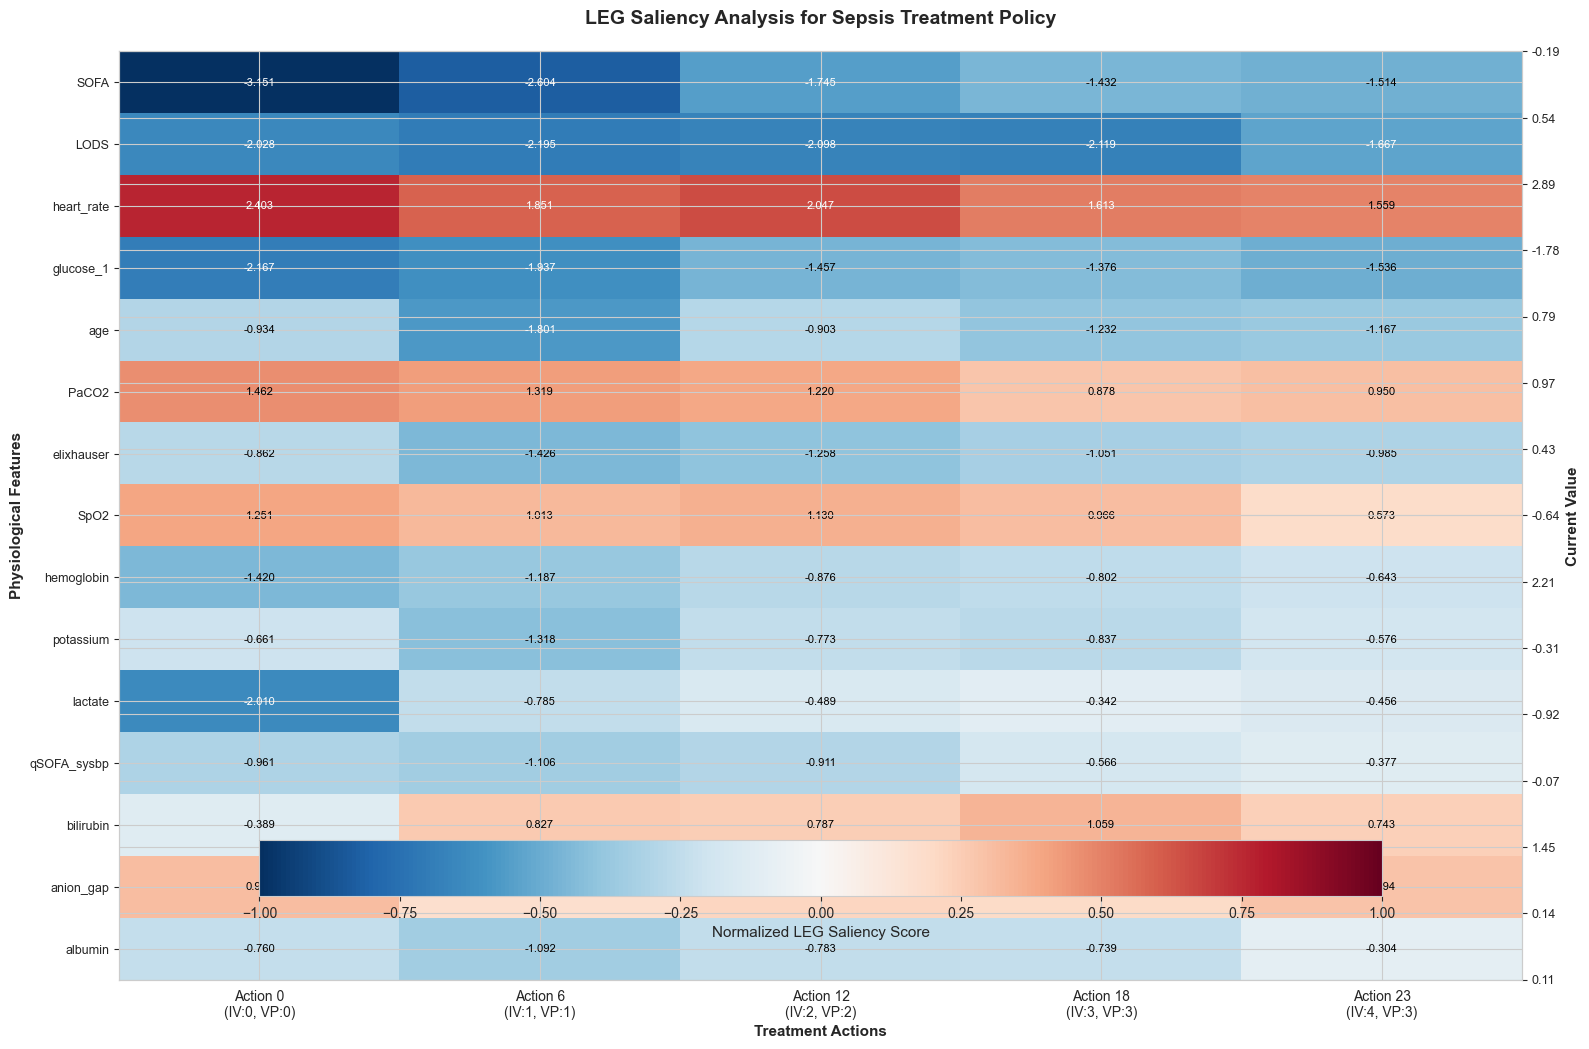


--- Analyzing State 7/10 (Episode 6, Timestep 4) ---
Analyzing 41 features...
Selected Action: 0 (IV=0, VP=0)
Top 5 Features:
  1. bilirubin: score=-1.6900, value=-0.35
  2. glucose_1: score=-1.5557, value=-0.03
  3. height: score=1.5069, value=1.11
  4. qSOFA_sysbp: score=0.9695, value=0.56
  5. creatinine: score=-0.8972, value=-0.35


C:\Users\liuji\AppData\Local\Temp\ipykernel_44928\3687775021.py:373: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved detailed analysis to ./sepsis_leg_analysis/analysis_state_6.png


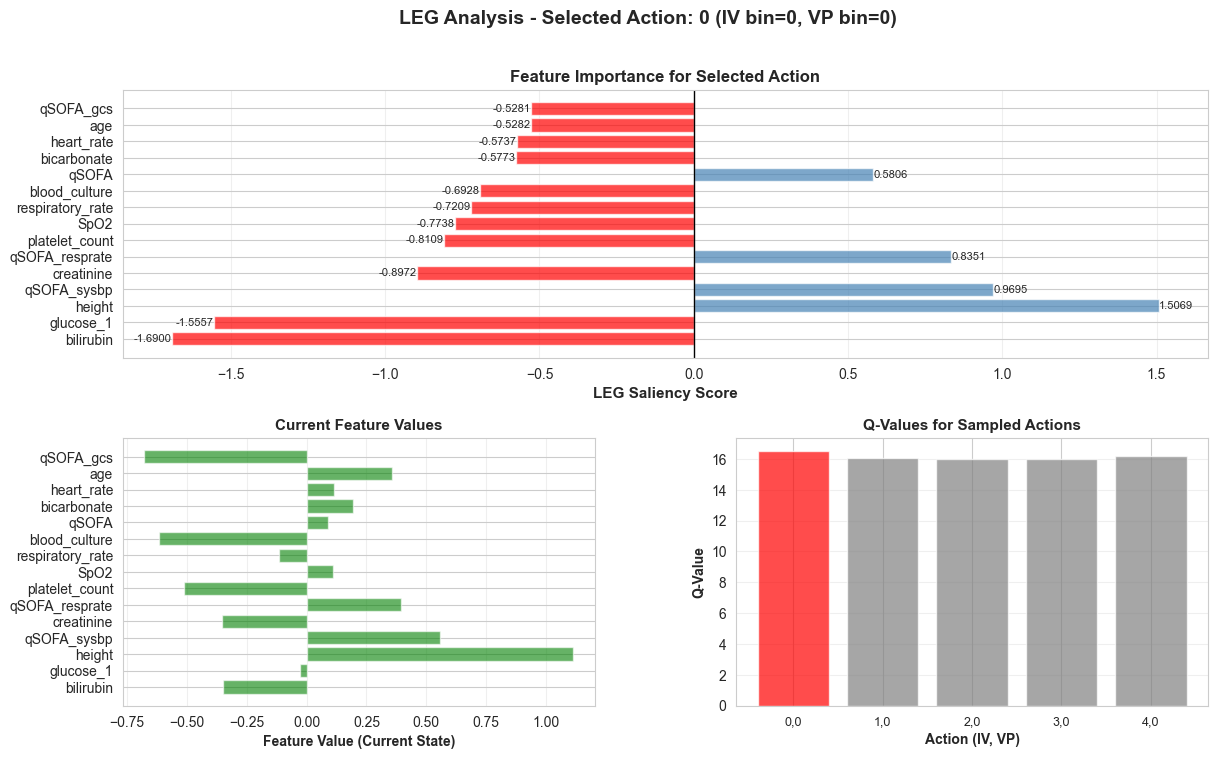

Saved saliency heatmap to ./sepsis_leg_analysis/saliency_state_6.png


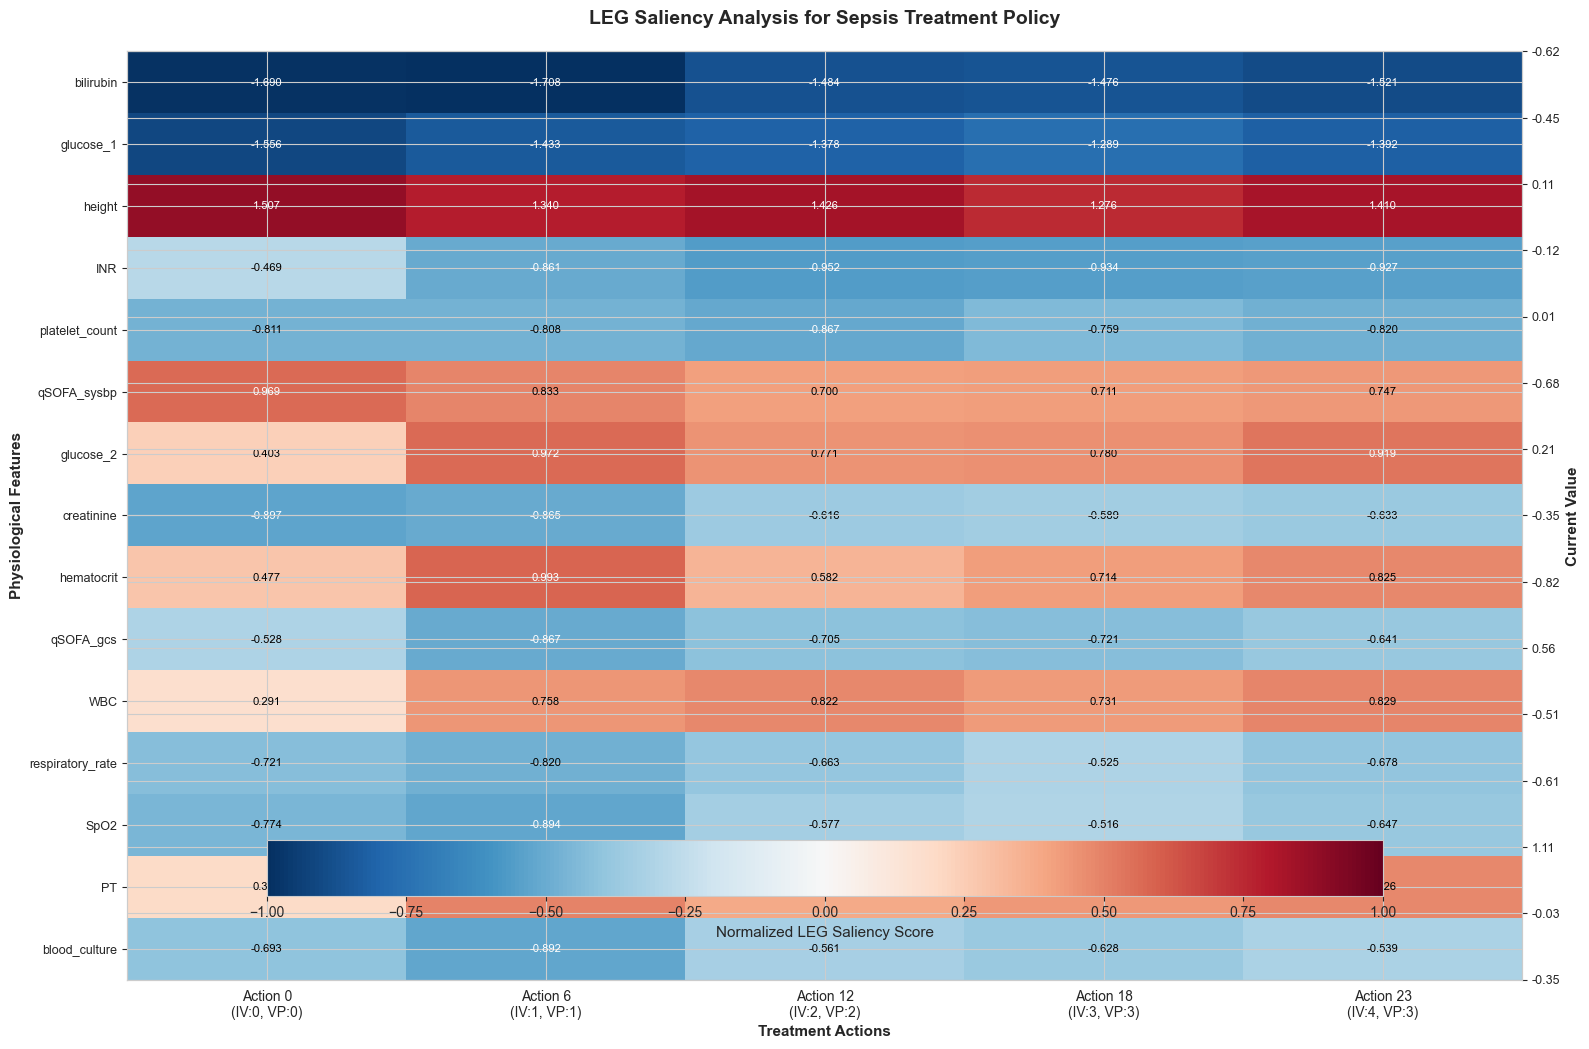


--- Analyzing State 8/10 (Episode 7, Timestep 5) ---
Analyzing 41 features...
Selected Action: 10 (IV=2, VP=0)
Top 5 Features:
  1. INR: score=-1.9645, value=-0.43
  2. qSOFA: score=1.8938, value=1.81
  3. PTT: score=-1.4655, value=-0.38
  4. glucose_1: score=-1.3185, value=-0.01
  5. ventilation: score=-1.2889, value=-1.34


C:\Users\liuji\AppData\Local\Temp\ipykernel_44928\3687775021.py:373: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved detailed analysis to ./sepsis_leg_analysis/analysis_state_7.png


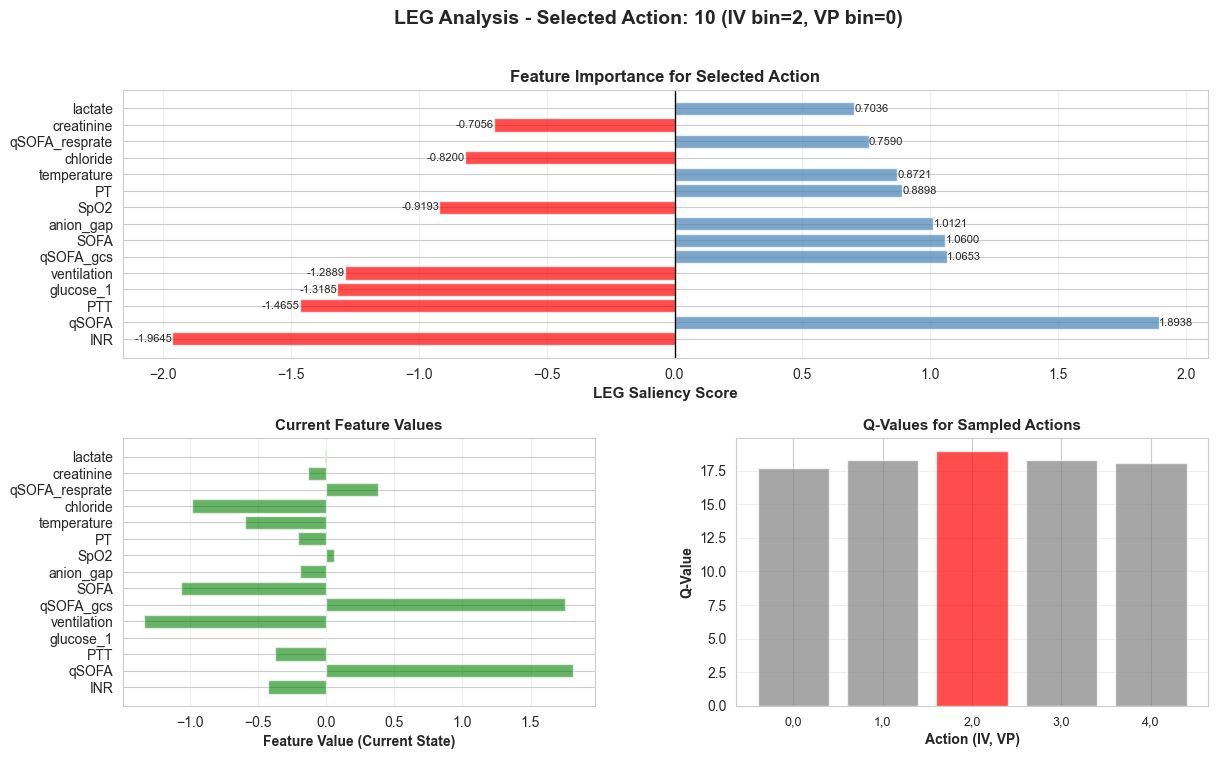

Saved saliency heatmap to ./sepsis_leg_analysis/saliency_state_7.png


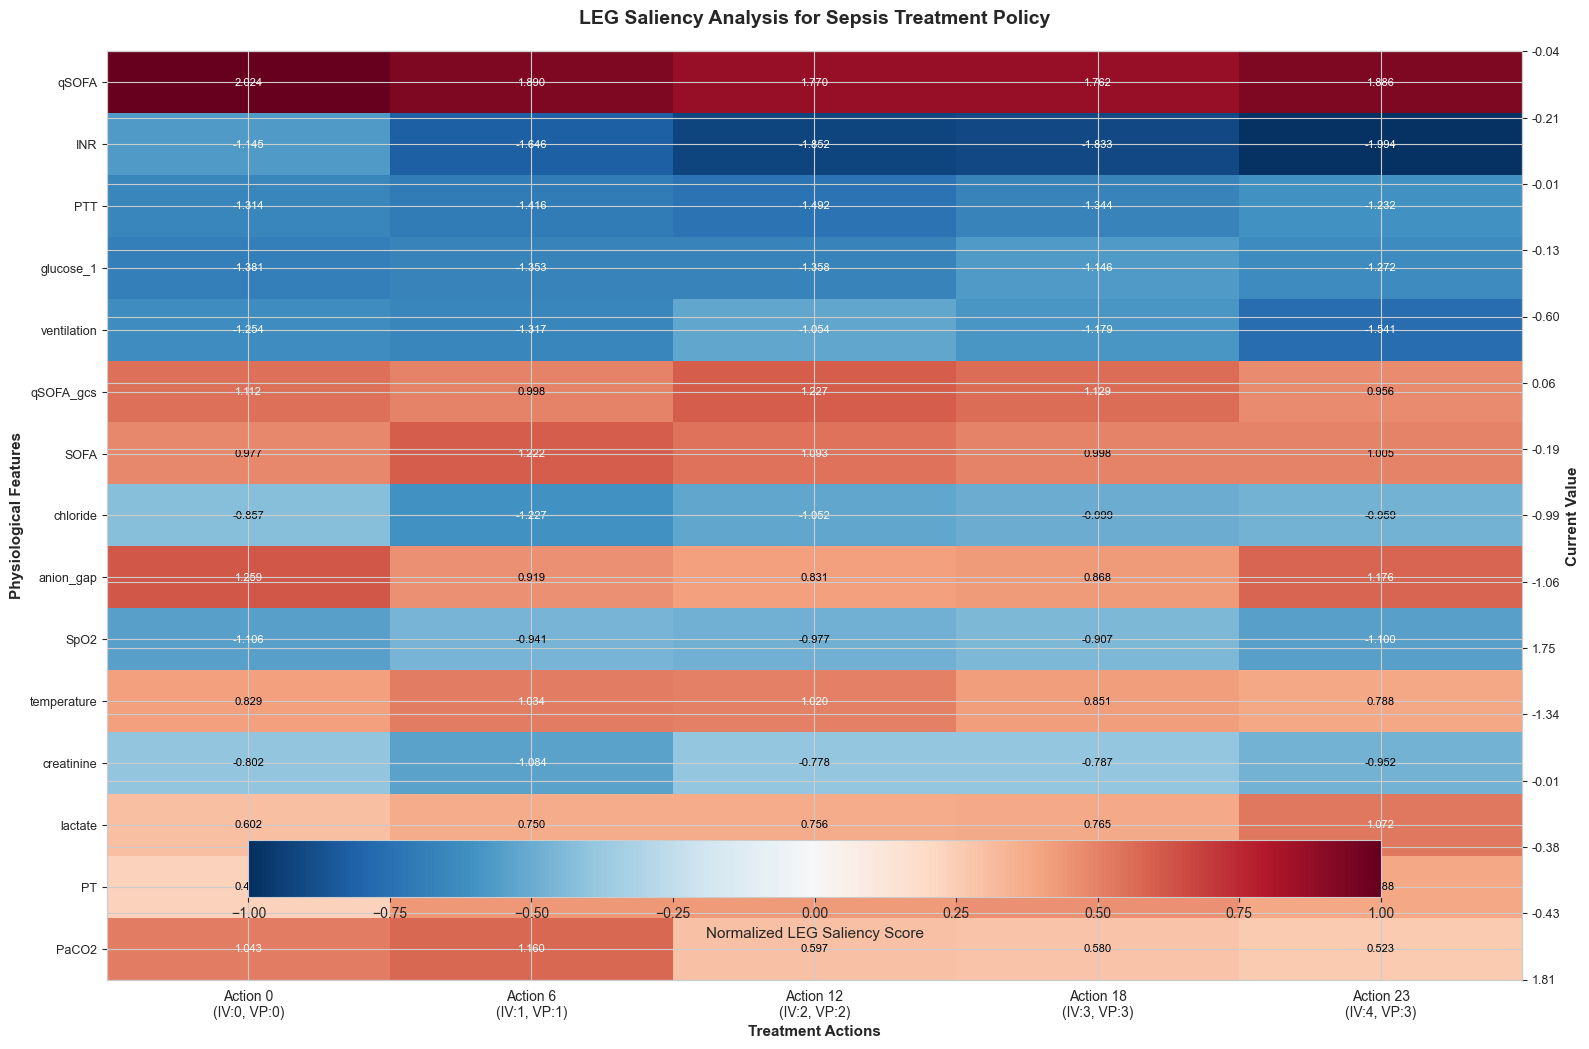


--- Analyzing State 9/10 (Episode 8, Timestep 5) ---
Analyzing 41 features...
Selected Action: 20 (IV=4, VP=0)
Top 5 Features:
  1. qSOFA_resprate: score=-2.0701, value=-2.46
  2. INR: score=-1.8552, value=-0.26
  3. bilirubin: score=-1.5392, value=0.20
  4. qSOFA_sysbp: score=1.4568, value=0.78
  5. glucose_1: score=-1.3651, value=-0.04


C:\Users\liuji\AppData\Local\Temp\ipykernel_44928\3687775021.py:373: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved detailed analysis to ./sepsis_leg_analysis/analysis_state_8.png


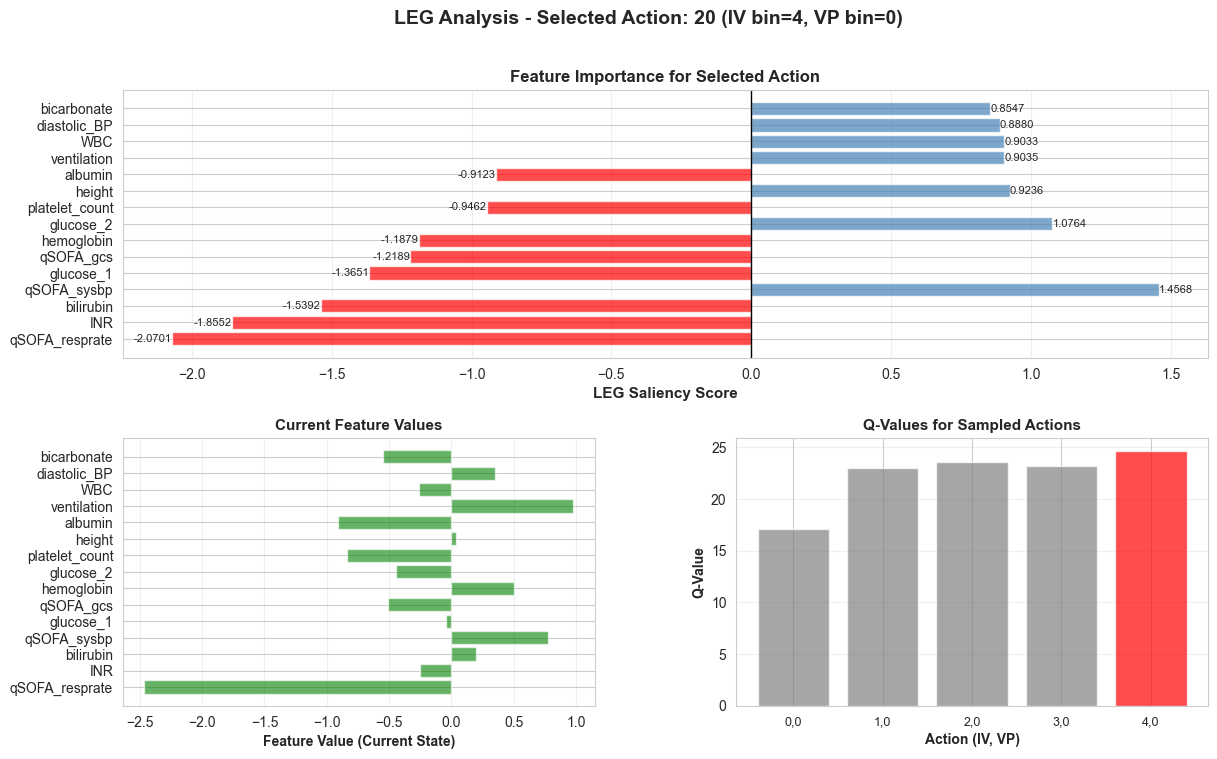

Saved saliency heatmap to ./sepsis_leg_analysis/saliency_state_8.png


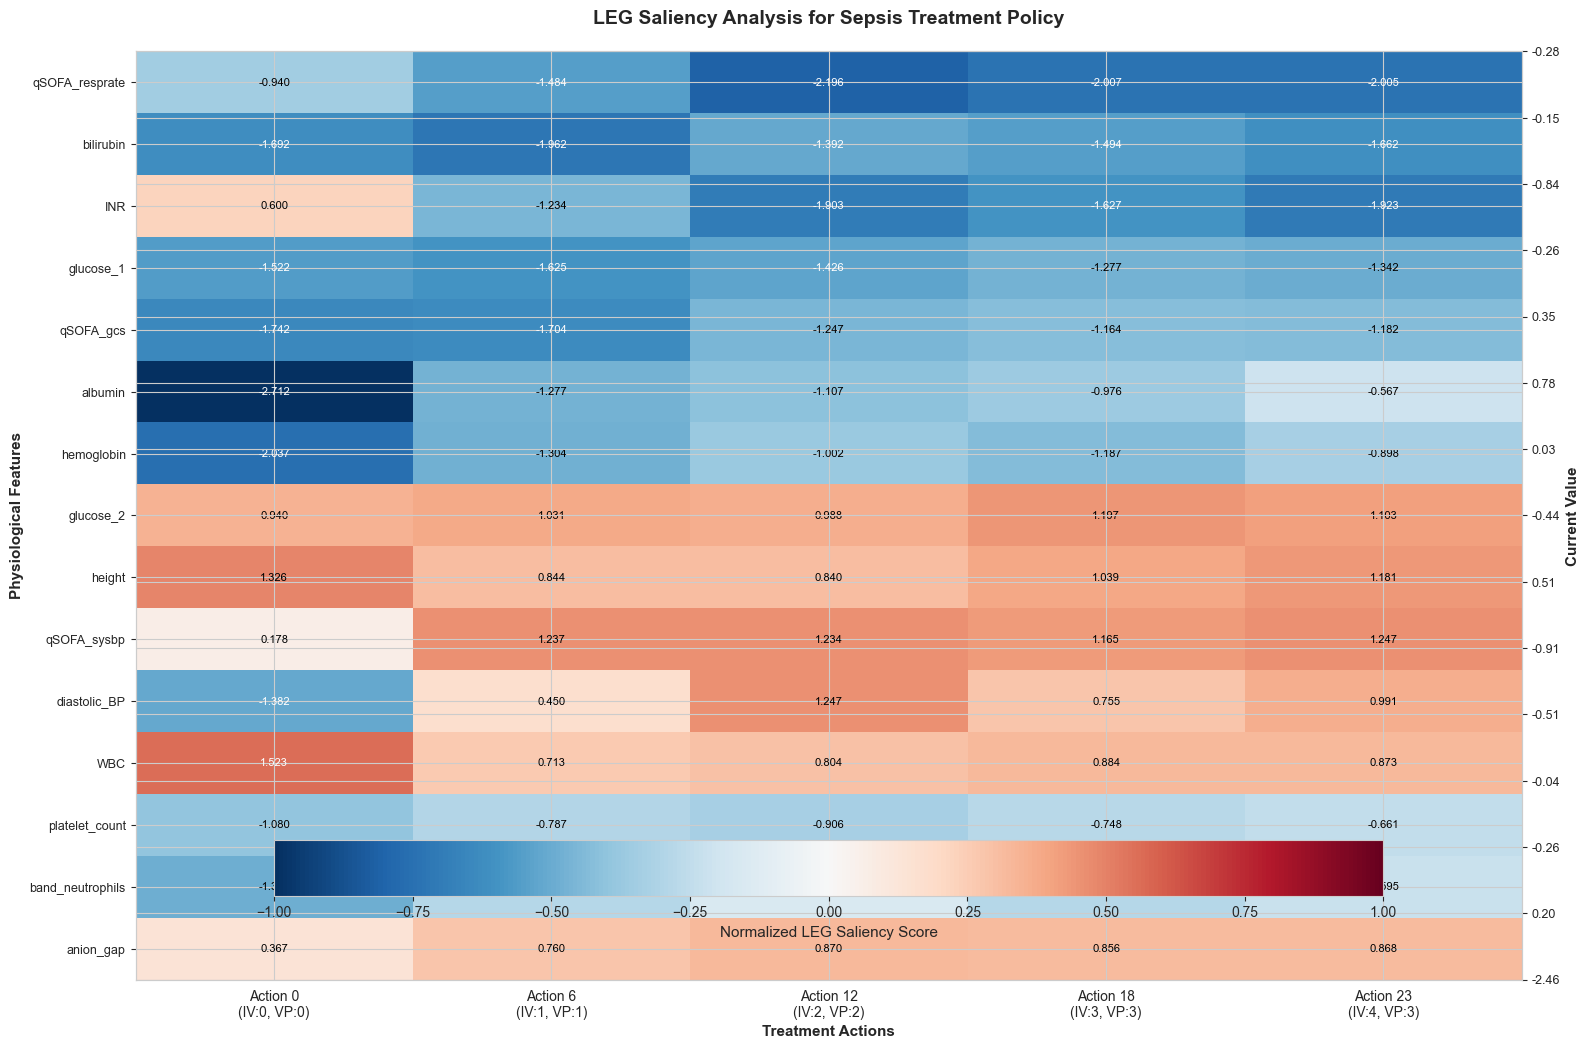


--- Analyzing State 10/10 (Episode 9, Timestep 4) ---
Analyzing 41 features...
Selected Action: 11 (IV=2, VP=1)
Top 5 Features:
  1. INR: score=-2.6333, value=0.19
  2. lactate: score=2.1676, value=0.30
  3. glucose_1: score=-1.9297, value=0.03
  4. sodium: score=-1.5327, value=0.35
  5. respiratory_rate: score=1.4979, value=0.98


C:\Users\liuji\AppData\Local\Temp\ipykernel_44928\3687775021.py:373: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved detailed analysis to ./sepsis_leg_analysis/analysis_state_9.png


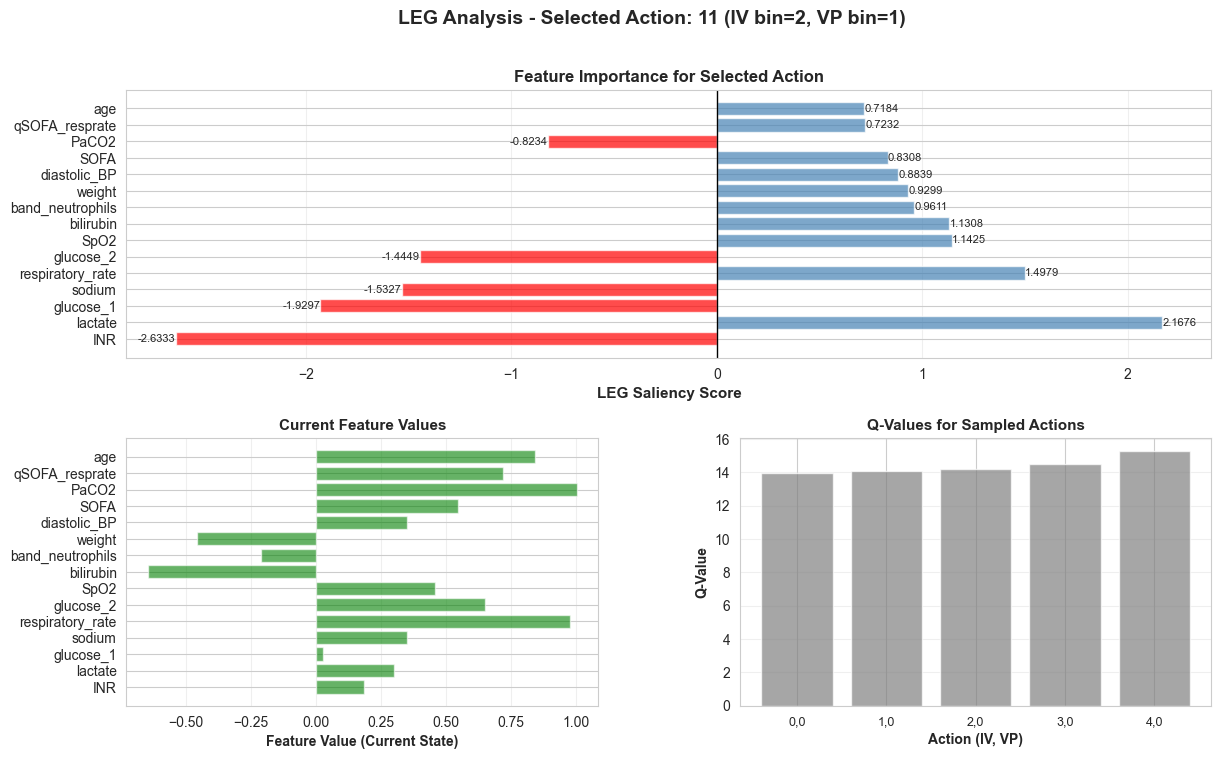

Saved saliency heatmap to ./sepsis_leg_analysis/saliency_state_9.png


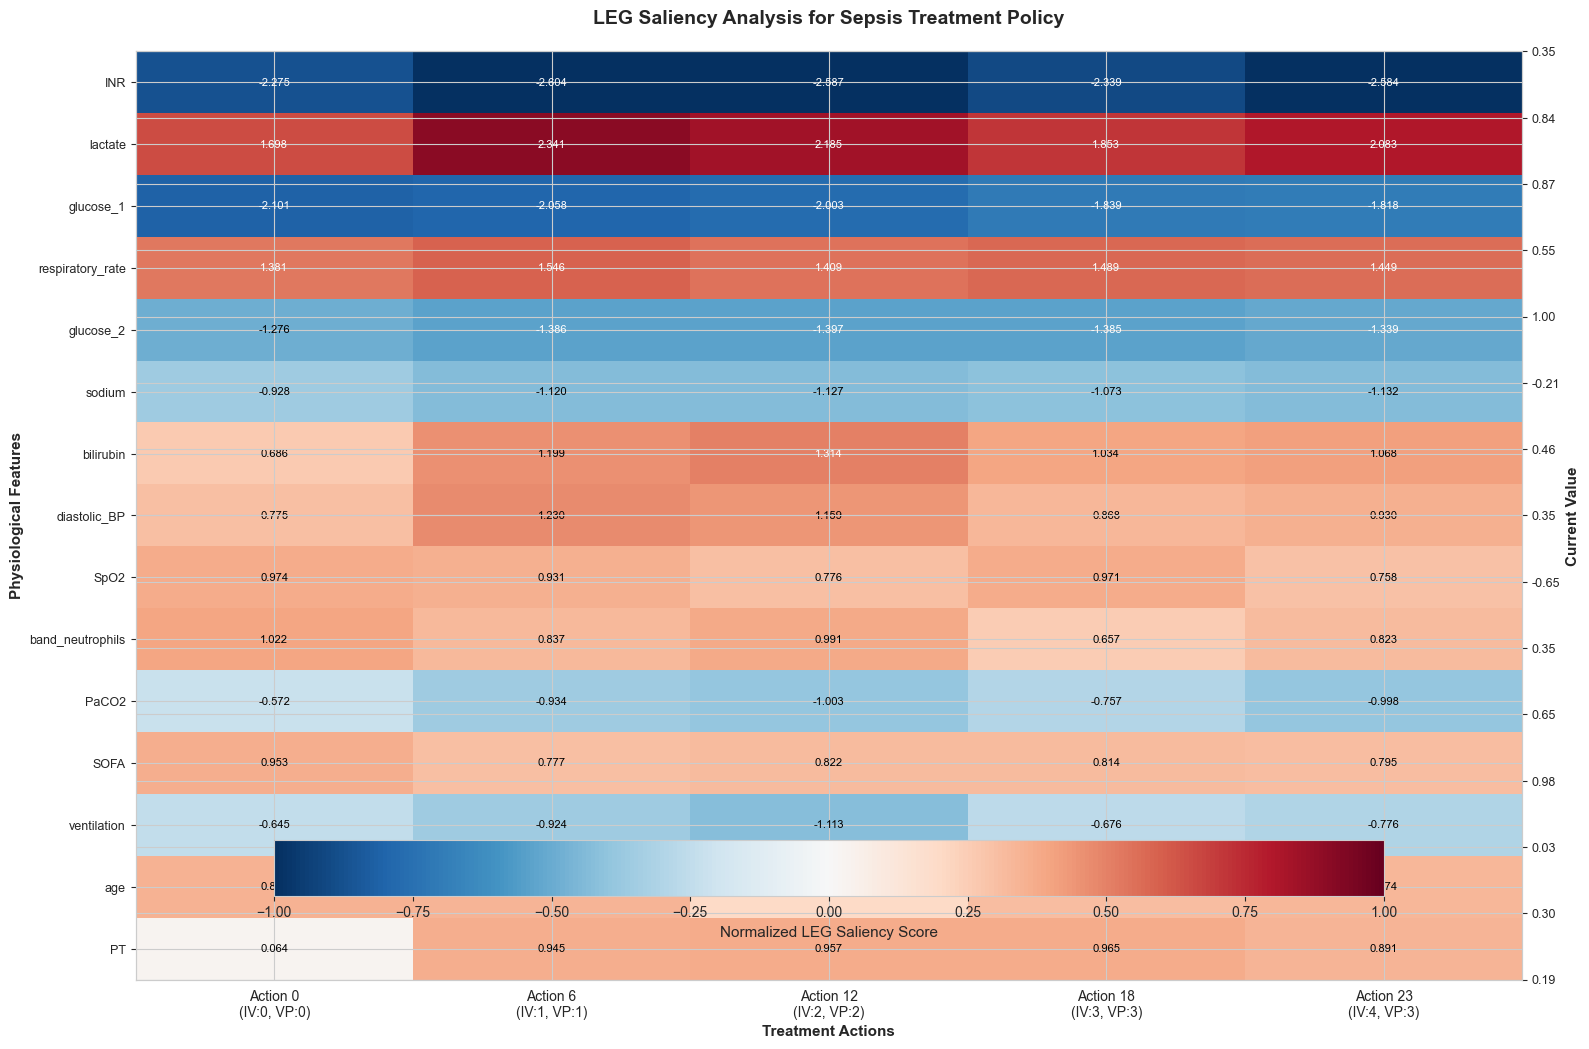


--- Analyzing Treatment Patterns ---
Saved treatment pattern to ./sepsis_leg_analysis/treatment_patterns.png


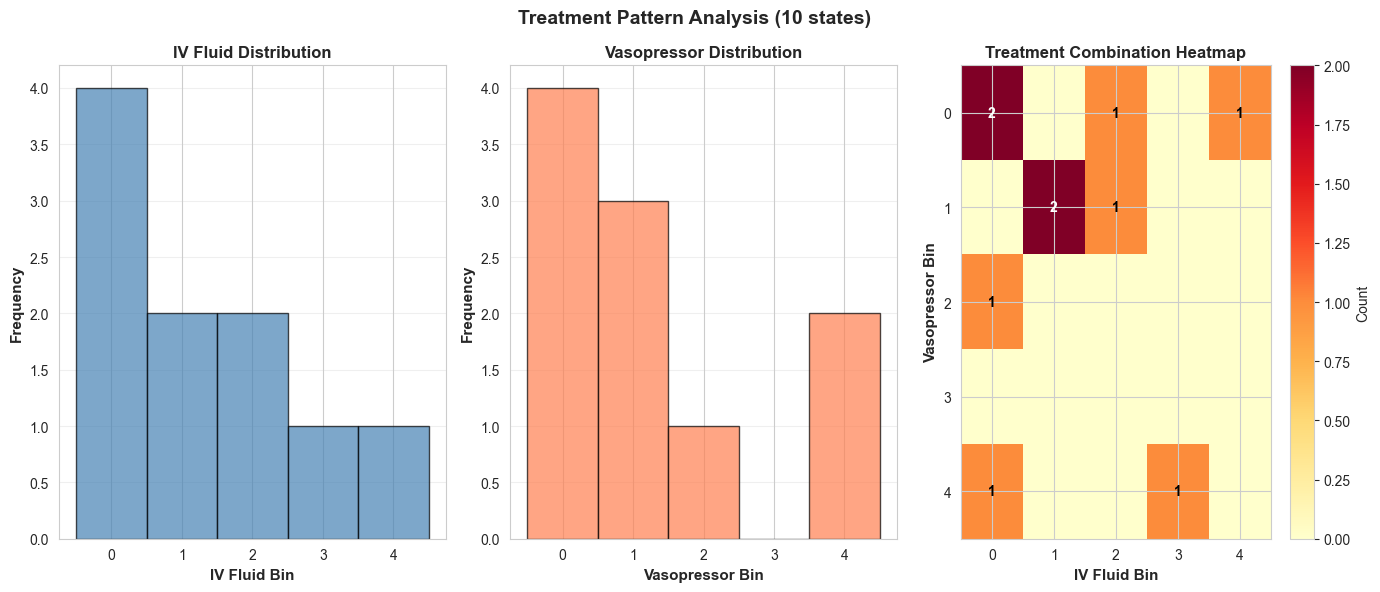

In [13]:
# Step 3: LEG Analysis
print('\nSTEP 4: LEG Analysis')
analyses = perform_leg_analysis(
    dqn_model=dqn,
    test_dataset=test_set,
    n_states=10,
    output_dir='./sepsis_leg_analysis'
)

In [11]:
class LEGAnalyzer:
    """Linearly Estimated Gradient analyzer for d3rlpy DQN policy."""
    
    def __init__(
        self,
        dqn_model,
        feature_names: List[str],
        n_samples: int = 1000,
        perturbation_std: float = 0.1
    ):
        """
        Initialize LEG analyzer.
        
        Args:
            dqn_model: Trained d3rlpy DQN model
            feature_names: Names of state features
            n_samples: Number of perturbation samples
            perturbation_std: Standard deviation for perturbations
        """
        self.dqn = dqn_model
        self.feature_names = feature_names
        self.n_samples = n_samples
        self.perturbation_std = perturbation_std
        
        # Get action dimension
        self.action_dim = 24  # Sepsis environment has 24 actions (0-23)
    
    def get_q_values(self, state: np.ndarray) -> np.ndarray:
        """Get Q-values for all actions given state."""
        if len(state.shape) == 1:
            state = state.reshape(1, -1)
        
        q_values = np.array([
            self.dqn.predict_value(state, np.array([a]))[0]
            for a in range(self.action_dim)
        ])
        return q_values
    
    def compute_saliency_scores(
        self,
        state: np.ndarray,
        feature_indices: List[int] = None,
        feature_ranges: Dict[int, Tuple[float, float]] = None
    ) -> Dict[str, np.ndarray]:
        """
        Compute LEG saliency scores for all actions.
        
        Args:
            state: Current state (46-dimensional)
            feature_indices: Indices of features to perturb (None = all)
            feature_ranges: Valid ranges for each feature (for clipping)
        
        Returns:
            Dictionary mapping action indices to saliency score arrays
        """
        if feature_indices is None:
            feature_indices = list(range(len(state)))
        
        # Get Q-values for original state
        q_values_original = self.get_q_values(state)
        
        n_features = len(feature_indices)
        
        # Initialize saliency scores for each action
        saliency_scores = {action: np.zeros(len(state)) for action in range(self.action_dim)}
        
        # Generate perturbations from uniform distribution
        perturbations = np.random.normal(0, self.perturbation_std, 
                                        (self.n_samples, n_features))
        
        # Compute covariance matrix
        Sigma = np.cov(perturbations.T)
        # Add small ridge for numerical stability
        Sigma += np.eye(Sigma.shape[0]) * 1e-6
        Sigma_inv = np.linalg.pinv(Sigma)
        
        # Store differences
        Z_list = []
        y_diff_list = {action: [] for action in range(self.action_dim)}
        
        for i in range(self.n_samples):
            # Create perturbed state
            perturbed_state = state.copy()
            perturbed_state[feature_indices] += perturbations[i]
            
            # Clip to valid ranges if provided
            if feature_ranges:
                for idx, feature_idx in enumerate(feature_indices):
                    if feature_idx in feature_ranges:
                        min_val, max_val = feature_ranges[feature_idx]
                        perturbed_state[feature_idx] = np.clip(
                            perturbed_state[feature_idx], min_val, max_val
                        )
            
            # Get Q-values for perturbed state
            q_values_perturbed = self.get_q_values(perturbed_state)
            
            # Store Z (perturbation)
            Z_list.append(perturbations[i])
            
            # Store y differences for each action
            for action in range(self.action_dim):
                y_diff = q_values_perturbed[action] - q_values_original[action]
                y_diff_list[action].append(y_diff)
        
        # Convert to arrays
        Z_array = np.array(Z_list)
        
        # Compute LEG gradient estimate for each action (Equation 1 from paper)
        for action in range(self.action_dim):
            y_diff_array = np.array(y_diff_list[action])
            
            # γ̂(π, s₀, F) = Σ⁻¹ (1/n) Σᵢ(ŷᵢZᵢ)
            gradient_reduced = Sigma_inv @ (Z_array.T @ y_diff_array) / self.n_samples
            
            # Map back to full feature space
            for idx, feature_idx in enumerate(feature_indices):
                saliency_scores[action][feature_idx] = gradient_reduced[idx]
        
        return saliency_scores
    
    def analyze_state(
        self,
        state: np.ndarray,
        top_k: int = 15,
        feature_subset: List[str] = None
    ) -> Dict:
        """
        Perform comprehensive LEG analysis on a state.
        
        Args:
            state: Current state
            top_k: Number of top features to return
            feature_subset: Subset of feature names to analyze
            
        Returns:
            Dictionary with analysis results
        """
        # Determine which features to analyze
        if feature_subset:
            feature_indices = [
                i for i, name in enumerate(self.feature_names)
                if name in feature_subset
            ]
        else:
            # Exclude discrete/categorical features for perturbation
            exclude_features = ['gender', 'race_white', 'race_black', 
                              'race_hispanic', 'race_other']
            feature_indices = [
                i for i, name in enumerate(self.feature_names)
                if name not in exclude_features
            ]
        
        print(f'Analyzing {len(feature_indices)} features...')
        
        # Compute saliency scores
        saliency_scores = self.compute_saliency_scores(state, feature_indices)
        
        # Get Q-values and selected action
        q_values = self.get_q_values(state)
        selected_action = int(np.argmax(q_values))
        
        # Find top-k most important features for selected action
        action_saliency = saliency_scores[selected_action]
        top_indices = np.argsort(np.abs(action_saliency))[-top_k:][::-1]
        
        # Decode action to IV and VP bins
        iv_bin = selected_action // 5
        vp_bin = selected_action % 5
        
        results = {
            'state': state,
            'q_values': q_values,
            'selected_action': selected_action,
            'iv_bin': iv_bin,
            'vp_bin': vp_bin,
            'saliency_scores': saliency_scores,
            'top_features': {
                'indices': top_indices,
                'names': [self.feature_names[i] for i in top_indices],
                'scores': action_saliency[top_indices],
                'values': state[top_indices]
            }
        }
        
        return results


# ============================================================================
# 4. Visualization Functions
# ============================================================================

class LEGVisualizer:
    """Visualization tools for LEG analysis."""
    
    def __init__(self, feature_names: List[str]):
        self.feature_names = feature_names
        sns.set_style("whitegrid")
    
    def plot_saliency_heatmap(
        self,
        saliency_scores: Dict[int, np.ndarray],
        state: np.ndarray,
        selected_actions: List[int] = None,
        top_k: int = 15,
        figsize: Tuple[int, int] = (16, 10),
        save_path: str = None
    ):
        """
        Create comprehensive saliency heatmap.
        
        Args:
            saliency_scores: Dictionary mapping actions to saliency arrays
            state: Current state values
            selected_actions: Actions to visualize (None = key actions)
            top_k: Number of top features to display
            figsize: Figure size
            save_path: Path to save figure
        """
        if selected_actions is None:
            # Show representative actions
            selected_actions = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,14, 15, 16,17, 18, 19, 20, 21, 22, 23]  # No treatment to max treatment
        
        n_actions = len(selected_actions)
        
        # Find top-k features across selected actions
        all_scores = np.array([saliency_scores[a] for a in selected_actions])
        importance = np.abs(all_scores).sum(axis=0)
        top_indices = np.argsort(importance)[-top_k:][::-1]
        
        # Prepare data
        data = []
        feature_labels = []
        state_values = []
        
        for idx in top_indices:
            feature_labels.append(self.feature_names[idx])
            state_values.append(state[idx])
            row = [saliency_scores[a][idx] for a in selected_actions]
            data.append(row)
        
        data = np.array(data)
        
        # Normalize for visualization
        max_abs = np.abs(data).max()
        if max_abs > 0:
            data_norm = data / max_abs
        else:
            data_norm = data
        
        # Create figure
        fig, ax = plt.subplots(figsize=figsize)
        
        # Create heatmap
        im = ax.imshow(data_norm, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
        
        # Set ticks and labels
        ax.set_xticks(range(n_actions))
        action_labels = []
        for a in selected_actions:
            iv, vp = a // 5, a % 5
            action_labels.append(f'Action {a}\n(IV:{iv}, VP:{vp})')
        ax.set_xticklabels(action_labels, fontsize=10)
        
        ax.set_yticks(range(top_k))
        ax.set_yticklabels(feature_labels, fontsize=9)
        
        # Add value annotations
        for i in range(top_k):
            for j in range(n_actions):
                score = data[i, j]
                text_color = 'white' if abs(data_norm[i, j]) > 0.5 else 'black'
                ax.text(j, i, f'{score:.3f}',
                       ha='center', va='center', 
                       color=text_color, fontsize=8)
        
        # Add state values on the right
        ax2 = ax.twinx()
        ax2.set_yticks(range(top_k))
        ax2.set_yticklabels([f'{val:.2f}' for val in state_values], fontsize=9)
        ax2.set_ylabel('Current Value', fontsize=11, fontweight='bold')
        
        # Colorbar
        cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.1, shrink=0.8)
        cbar.set_label('Normalized LEG Saliency Score', fontsize=11)
        
        # Title
        ax.set_title('LEG Saliency Analysis for Sepsis Treatment Policy',
                    fontsize=14, fontweight='bold', pad=20)
        ax.set_xlabel('Treatment Actions', fontsize=11, fontweight='bold')
        ax.set_ylabel('Physiological Features', fontsize=11, fontweight='bold')
        
        plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f'Saved saliency heatmap to {save_path}')
        
        plt.show()
    
    def plot_top_features_detailed(
        self,
        analysis_results: Dict,
        figsize: Tuple[int, int] = (14, 8),
        save_path: str = None
    ):
        """Plot detailed analysis of top features."""
        top_features = analysis_results['top_features']
        selected_action = analysis_results['selected_action']
        iv_bin = analysis_results['iv_bin']
        vp_bin = analysis_results['vp_bin']
        
        fig = plt.figure(figsize=figsize)
        gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)
        
        # Plot 1: Saliency scores
        ax1 = fig.add_subplot(gs[0, :])
        colors = ['red' if s < 0 else 'steelblue' for s in top_features['scores']]
        bars = ax1.barh(range(len(top_features['names'])), 
                       top_features['scores'], color=colors, alpha=0.7)
        ax1.set_yticks(range(len(top_features['names'])))
        ax1.set_yticklabels(top_features['names'], fontsize=10)
        ax1.set_xlabel('LEG Saliency Score', fontsize=11, fontweight='bold')
        ax1.set_title('Feature Importance for Selected Action', 
                     fontsize=12, fontweight='bold')
        ax1.axvline(x=0, color='black', linestyle='-', linewidth=1)
        ax1.grid(axis='x', alpha=0.3)
        
        # Add value labels
        for i, (score, val) in enumerate(zip(top_features['scores'], 
                                            top_features['values'])):
            label = f'{score:.4f}'
            x_pos = score + (0.001 if score > 0 else -0.001)
            ha = 'left' if score > 0 else 'right'
            ax1.text(x_pos, i, label, va='center', ha=ha, fontsize=8)
        
        # Plot 2: Feature values
        ax2 = fig.add_subplot(gs[1, 0])
        ax2.barh(range(len(top_features['names'])), 
                top_features['values'], color='green', alpha=0.6)
        ax2.set_yticks(range(len(top_features['names'])))
        ax2.set_yticklabels(top_features['names'], fontsize=10)
        ax2.set_xlabel('Feature Value (Current State)', fontsize=10, fontweight='bold')
        ax2.set_title('Current Feature Values', fontsize=11, fontweight='bold')
        ax2.grid(axis='x', alpha=0.3)
        
        # Plot 3: Q-values
        ax3 = fig.add_subplot(gs[1, 1])
        q_values = analysis_results['q_values']
        actions = list(range(len(q_values)))
        
        # Sample every 5th action for clarity
        sample_actions = actions[::5]
        sample_q = [q_values[a] for a in sample_actions]
        
        colors = ['red' if a == selected_action else 'gray' 
                 for a in sample_actions]
        ax3.bar(range(len(sample_actions)), sample_q, color=colors, alpha=0.7)
        ax3.set_xticks(range(len(sample_actions)))
        ax3.set_xticklabels([f'{a//5},{a%5}' for a in sample_actions], 
                           fontsize=9)
        ax3.set_xlabel('Action (IV, VP)', fontsize=10, fontweight='bold')
        ax3.set_ylabel('Q-Value', fontsize=10, fontweight='bold')
        ax3.set_title('Q-Values for Sampled Actions', fontsize=11, fontweight='bold')
        ax3.grid(axis='y', alpha=0.3)
        
        # Super title
        fig.suptitle(
            f'LEG Analysis - Selected Action: {selected_action} (IV bin={iv_bin}, VP bin={vp_bin})',
            fontsize=14, fontweight='bold', y=0.98
        )
        
        plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f'Saved detailed analysis to {save_path}')
        
        plt.show()
    
    def plot_treatment_pattern(
        self,
        multiple_analyses: List[Dict],
        figsize: Tuple[int, int] = (14, 6),
        save_path: str = None
    ):
        """
        Analyze treatment patterns across multiple states.
        
        Args:
            multiple_analyses: List of analysis results from different states
        """
        n_states = len(multiple_analyses)
        
        fig, axes = plt.subplots(1, 3, figsize=figsize)
        
        # Collect data
        iv_bins = [a['iv_bin'] for a in multiple_analyses]
        vp_bins = [a['vp_bin'] for a in multiple_analyses]
        rewards = [sum(a.get('rewards', [0])) for a in multiple_analyses]
        
        # Plot 1: IV distribution
        axes[0].hist(iv_bins, bins=5, range=(-0.5, 4.5), 
                    color='steelblue', alpha=0.7, edgecolor='black')
        axes[0].set_xlabel('IV Fluid Bin', fontsize=11, fontweight='bold')
        axes[0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
        axes[0].set_title('IV Fluid Distribution', fontsize=12, fontweight='bold')
        axes[0].set_xticks(range(5))
        axes[0].grid(axis='y', alpha=0.3)
        
        # Plot 2: VP distribution
        axes[1].hist(vp_bins, bins=5, range=(-0.5, 4.5), 
                    color='coral', alpha=0.7, edgecolor='black')
        axes[1].set_xlabel('Vasopressor Bin', fontsize=11, fontweight='bold')
        axes[1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
        axes[1].set_title('Vasopressor Distribution', fontsize=12, fontweight='bold')
        axes[1].set_xticks(range(5))
        axes[1].grid(axis='y', alpha=0.3)
        
        # Plot 3: 2D heatmap
        treatment_grid = np.zeros((5, 5))
        for iv, vp in zip(iv_bins, vp_bins):
            treatment_grid[vp, iv] += 1
        
        im = axes[2].imshow(treatment_grid, cmap='YlOrRd', aspect='auto')
        axes[2].set_xlabel('IV Fluid Bin', fontsize=11, fontweight='bold')
        axes[2].set_ylabel('Vasopressor Bin', fontsize=11, fontweight='bold')
        axes[2].set_title('Treatment Combination Heatmap', 
                         fontsize=12, fontweight='bold')
        axes[2].set_xticks(range(5))
        axes[2].set_yticks(range(5))
        
        # Add counts
        for i in range(5):
            for j in range(5):
                count = int(treatment_grid[i, j])
                if count > 0:
                    axes[2].text(j, i, str(count), ha='center', va='center',
                               color='white' if count > treatment_grid.max()/2 else 'black',
                               fontweight='bold')
        
        plt.colorbar(im, ax=axes[2], label='Count')
        
        fig.suptitle(f'Treatment Pattern Analysis ({n_states} states)',
                    fontsize=14, fontweight='bold')
        plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f'Saved treatment pattern to {save_path}')
        
        plt.show()


# ============================================================================
# 5. Complete Pipeline
# ============================================================================

def perform_leg_analysis(
    dqn_model,
    test_dataset: MDPDataset,
    n_states: int = 10,
    output_dir: str = './leg_results'
):
    """Perform LEG analysis on test states."""
    os.makedirs(output_dir, exist_ok=True)
    
    print('\n' + '=' * 60)
    print('Performing LEG Analysis')
    print('=' * 60)
    
    # Initialize analyzer and visualizer
    leg_analyzer = LEGAnalyzer(
        dqn_model=dqn_model,
        feature_names=FEATURE_NAMES,
        n_samples=1000,
        perturbation_std=0.1
    )
    
    visualizer = LEGVisualizer(FEATURE_NAMES)
    
    # Sample states from test dataset
    all_episodes = test_dataset.episodes
    analyses = []
    
    for i in range(min(n_states, len(all_episodes))):
        episode = all_episodes[i]
        
        # Analyze middle state of episode
        mid_idx = len(episode) // 2
        state = episode.observations[mid_idx]
        
        print(f'\n--- Analyzing State {i+1}/{n_states} (Episode {i}, Timestep {mid_idx}) ---')
        
        # Perform analysis
        analysis = leg_analyzer.analyze_state(state, top_k=15)
        analyses.append(analysis)
        
        # Print summary
        print(f'Selected Action: {analysis["selected_action"]} '
              f'(IV={analysis["iv_bin"]}, VP={analysis["vp_bin"]})')
        print(f'Top 5 Features:')
        for j in range(min(5, len(analysis['top_features']['names']))):
            name = analysis['top_features']['names'][j]
            score = analysis['top_features']['scores'][j]
            value = analysis['top_features']['values'][j]
            print(f'  {j+1}. {name}: score={score:.4f}, value={value:.2f}')
        
        # Visualize
        visualizer.plot_top_features_detailed(
            analysis,
            save_path=f'{output_dir}/analysis_state_{i}.png'
        )
        
        visualizer.plot_saliency_heatmap(
            analysis['saliency_scores'],
            state,
            selected_actions=[0, 6, 12, 18, 23],
            top_k=15,
            save_path=f'{output_dir}/saliency_state_{i}.png'
        )
    
    # Analyze treatment patterns
    print('\n--- Analyzing Treatment Patterns ---')
    visualizer.plot_treatment_pattern(
        analyses,
        save_path=f'{output_dir}/treatment_patterns.png'
    )
    
    return analyses